### This file is for BEFORE Google Colab updated on 2023-07-21
Important things to note:
1. Colab's Ubuntu upgraded from 20.04 LTS to 22.04 LTS
2. Colab's Cuda upgraded, and downgrading it was impossible due to Ubuntu's upgrade.

These changes broke the previous GPU-enabled MXNet version I used, `mxnet-cu110`, because I could not downgrade Cuda.

### Therefore, the **old notebooks may not run completely** due to notebook cells that attempt to downgrade Cuda.

## Install (CPU) MXNet, latest version

In [ ]:
!pip install mxnet==1.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
import mxnet as mx
import numpy as np
from mxnet import npx
from mxnet.gluon import nn, rnn
npx.set_np()
from mxnet import gluon
from mxnet import autograd

import time
import math

In [ ]:
# specify a context
ctx = mx.cpu()

#SimpleDataSet (basic 1-feature series)

creating basic data set
data.tau: 7        (amount of past observations to train with)
data.batch_size: 8
data set training dataloader sample:
[array([[-0.59053201, -0.63709817, -0.71134483, -0.65665552, -0.7470605 ,
        -0.68349693, -0.69935185],
       [ 0.8723348 ,  0.83753172,  0.95021811,  0.93405111,  0.87965955,
         0.83365381,  0.8340109 ],
       [ 0.63126904,  0.63574793,  0.5770347 ,  0.55503787,  0.50612874,
         0.52948524,  0.57003757],
       [ 0.2501971 ,  0.16469154,  0.19543465,  0.27905631,  0.28106446,
         0.17307908,  0.25576898],
       [ 0.93405111,  0.87965955,  0.83365381,  0.8340109 ,  0.87227802,
         0.85475151,  0.90639326],
       [ 0.5184382 ,  0.49534183,  0.49534612,  0.49502211,  0.4513152 ,
         0.42601109,  0.39388572],
       [-1.00956945, -0.93061704, -0.99560136, -0.92340906, -0.98116254,
        -1.04596947, -0.95871883],
       [ 0.72585714,  0.79120952,  0.64668803,  0.74919961,  0.70971858,
         0.65467659,  0.704

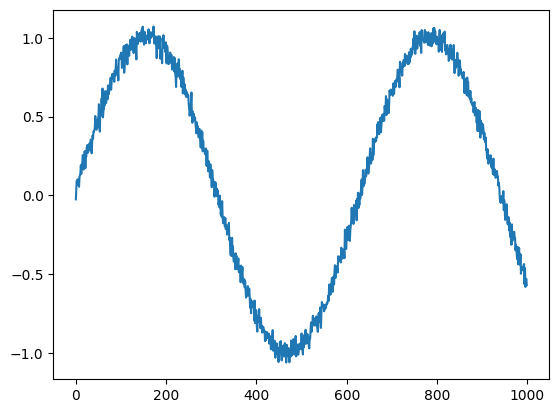

plotting another with no noise:


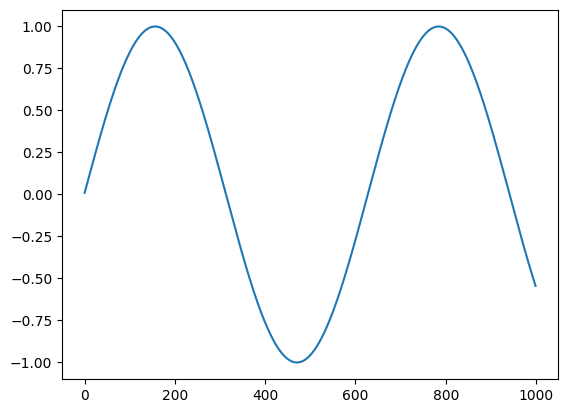

In [ ]:
import mxnet as mx
import numpy as np
from mxnet import npx
# from mxnet.gluon import nn, rnn
npx.set_np()


# adapted from https://d2l.ai/chapter_recurrent-neural-networks/sequence.html#training

class SimpleDataSet():

    def __init__(self, fn='sine', random_factor=0.2, batch_size=8, seq_length=7, num_samples=1000, num_train=600):
        '''fn = `'sine'`, `'exp'`, `'linear'`, `'quad'`, or a custom function that accepts parameters `(time, T)` where `time` is an array [1 to T+1] and `T` is `num_samples`'''
        self.batch_size = batch_size
        
        self.T = num_samples
        self.tau = seq_length  # past observations amount
        
        assert num_train <= num_samples, \
            'num_train must be <= num_samples'
        self.num_train = num_train
        
        self.time = np.arange(1, self.T + 1, dtype=np.float32)
        if fn == 'sine':
            ## sin wave with slight noise
            self.x = np.sin(0.01 * self.time) + np.random.randn(self.T) * 0.2 * random_factor
        elif fn == 'exp':
            ## exponential curve with slight noise
            self.x = np.power(0.1*( self.time - 0.5 + 4*random_factor*np.random.randn(self.T) ), 2)
        elif fn == 'linear':
            self.x = np.array(self.time) + 4*random_factor*np.random.randn(self.T)
        elif fn == 'quad':
            ## quadratic curve with slight noise
            self.x = self.time + np.power(self.time,2) + 4*random_factor*np.random.randn(self.T)

        else:
            self.x = fn(self.time, self.T)


    def get_tensorloader(self, tensors, train, indices=slice(0, None))   -> mx.gluon.data.DataLoader:
        # argument `tensors` would be like [features, labels]
        tensors = tuple(a[indices] for a in tensors)
        dataset = mx.gluon.data.ArrayDataset(*tensors)
        return mx.gluon.data.DataLoader(dataset, self.batch_size,
                                    shuffle=train)
    

    def get_dataloader(self, train)   -> mx.gluon.data.DataLoader:
        features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]
        self.features = np.stack(features, 1)
        self.labels = self.x[self.tau:].reshape((-1, 1))
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.features, self.labels], train, i)



if __name__ == '__main__':
    ## Code to do testing, if this file is ran directly

    print('creating basic data set')
    data = SimpleDataSet()
    # data = SimpleDataSet(fn='quad')
    # data = SimpleDataSet(fn='sine')
    print(f'data.tau: {data.tau}        (amount of past observations to train with)')
    print(f'data.batch_size: {data.batch_size}')

    # get a training dataloader from the dataset
    dataloader = data.get_dataloader(train=True)

    # get a sample batch of X, y from the dataloader
    dataloader_sample = next(iter(dataloader))
    print('data set training dataloader sample:')
    print(dataloader_sample)
    print(f'that sample\'s [X, y] shapes: {[arr.shape for arr in dataloader_sample]}')

    # plot the raw data points
    import matplotlib.pyplot as plt
    print('plotting graph of the raw data points data.x')
    plt.plot(data.x)
    plt.show()

    print('plotting another with no noise:')
    plt.plot(SimpleDataSet('sine',random_factor=0).x)
    plt.show()

# Google drive importing


In [ ]:
!ls

sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp 'drive/MyDrive/Colab Notebooks/jingjinji.csv' .
!cp 'drive/MyDrive/Colab Notebooks/data_filtering.py' .
!cp 'drive/MyDrive/Colab Notebooks/filtered_jingjinji.csv' .
!cp 'drive/MyDrive/Colab Notebooks/filtered_city_neighbors_cache.json' .
!cp 'drive/MyDrive/Colab Notebooks/filtered_pm25_stdized_info.json' .
!cp 'drive/MyDrive/Colab Notebooks/city_seq_dict.pickle' .
!cp -r 'drive/MyDrive/Colab Notebooks/city_seqs' ./city_seqs
!cp -r 'drive/MyDrive/Colab Notebooks/params' ./params
!ls

print()

import pandas as pd
# from data_filtering import prepare_dataframe
df: pd.DataFrame = pd.read_csv('jingjinji.csv')
# df = prepare_dataframe(df)   # not needed, already cached

import pickle
with open('city_seq_dict.pickle', 'rb') as f:
    city_seqs = pickle.load(f)

print(type(city_seqs), len(city_seqs))
print(type(city_seqs['三门峡市']), len(city_seqs['三门峡市']))
print(type(city_seqs['三门峡市'][0]), city_seqs['三门峡市'][0].shape)
print(type(city_seqs['三门峡市'][1]), city_seqs['三门峡市'][1].shape)

# print('first 3 of X city_seqs for city "三门峡市":')
# print(city_seqs['三门峡市'][0][:3])
print('first 3 of Y city_seqs for city "三门峡市":')
print(city_seqs['三门峡市'][1][:3])

city_seq_dict.pickle  filtered_city_neighbors_cache.json  params
city_seqs	      filtered_jingjinji.csv		  __pycache__
data_filtering.py     filtered_pm25_stdized_info.json	  sample_data
drive		      jingjinji.csv			  test.py

<class 'dict'> 108
<class 'tuple'> 2
<class 'numpy.ndarray'> (625, 7, 11)
<class 'numpy.ndarray'> (625, 1)
first 3 of Y city_seqs for city "三门峡市":
[[ 4.49631602]
 [ 1.22489156]
 [-0.72741014]]


In [ ]:
cities = list(set(df['cityname']))
print('len(cities):', len(cities), '  (expect 108)')  # EXPECT 108

valid_cities = cities[10:21]
test_cities = cities[31:41]
train_cities = [city for city in cities if city not in valid_cities+test_cities]

len(cities): 108   (expect 108)


In [ ]:
sorted_cities = sorted(list(set(df['cityname'])))
print('len(sorted_cities):', len(sorted_cities), '  (expect 108)')  # EXPECT 108

print('unsorted:', valid_cities)
print('sorted:  ', sorted_cities[10:21])

len(sorted_cities): 108   (expect 108)
unsorted: ['池州市', '漯河市', '温州市', '衢州市', '亳州市', '宿迁市', '邯郸市', '徐州市', '榆林市', '宁波市', '丽水市']
sorted:   ['北京市', '南京市', '南通市', '南阳市', '台州市', '合肥市', '吕梁市', '周口市', '咸阳市', '唐山市', '商丘市']


In [ ]:
# testing saving to file
with open('test_out.txt', 'w') as f:
    f.write('hello world')
!cp 'test_out.txt' 'drive/MyDrive/Colab Notebooks/test_out.txt'

# test read from that saved file
!cp 'drive/MyDrive/Colab Notebooks/test_out.txt' .
with open('test_out.txt', 'r') as f:
    print(f.read())

hello world


## City pm2.5 graphed on date x-axis

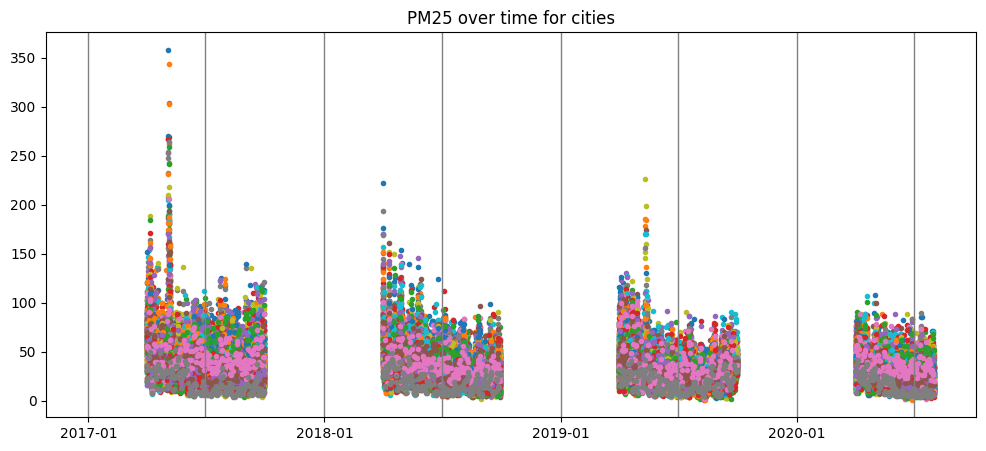

In [ ]:
## Graph cities' data on a date x-axis
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12, 5))
axes1 = fig.add_subplot(1, 2, (1,2))

df = pd.read_csv('jingjinji.csv')
df['date'] = pd.to_datetime(df['date'], errors='raise')
df_groupByCity = df.groupby('cityname')

for city, _subset_df in df_groupByCity:
    _subset_df = _subset_df.sort_values('date')
    x = _subset_df['date'].to_numpy()
    y = _subset_df['PM25'].to_numpy()
    axes1.plot(x, y, '.', linewidth=1)

#https://stackoverflow.com/questions/19079143/how-to-plot-time-series-in-python
xmin, xmax = map(mdates.num2date, axes1.get_xlim())               # get dates on x-limits as dates
for yr in range(xmin.year, xmax.year + 1):
    axes1.axvline(datetime(yr, 1, 1), color='gray', linewidth=1)       # vertical line on Jan 1 midnight
    axes1.axvline(datetime(yr, 7, 1), color='gray', linewidth=1)       # vertical line on July 1 midnight
# if the tick labels are too crowded, keep only a few of them
# pos, labels = plt.xticks()                       # get xtick positions and labels
# plt.xticks(pos[::2], labels[::2]);               # keep only every second tick
pos = axes1.get_xticks()                       # get xtick positions and labels
labels = axes1.get_xticklabels()
axes1.set_xticks(pos[::2]);               # keep only every second tick
axes1.set_xticklabels(labels[::2]);

# axes1.legend()
axes1.set_title('PM25 over time for cities')

plt.show()

In [ ]:
!pip list | grep "plotly"

plotly                        5.13.1


# CityDataSet

undo PM 2.5 standardization to the unstandardized value

`unst = (st * std) + mean`

In [ ]:
import json
with open('filtered_pm25_stdized_info.json', 'rb') as f:
    _pm25_stdized = json.load(f)
pm25_std, pm25_mean = _pm25_stdized['pm25_std'], _pm25_stdized['pm25_mean']

def undo_pm25_standardization(standardized_pm25):
    '''undo standardization for pm2.5 values (within calculation precision)
    \nWhen stardardizing: `st = (unst - mean) / std`
    therefore: `unst = (st * std) + mean`'''
    return (standardized_pm25 * pm25_std) + pm25_mean

In [ ]:
class CityDataSet:

    def __init__(self, city_seqs_dict: dict[tuple[np.ndarray, np.ndarray]], train_city_list, validate_city_list, batch_size = 8):
        self.batch_size = batch_size
        # concatenate the training city's sequences into X, y
        trainX, trainy = [], []
        for city in train_city_list:
            cX, cy = city_seqs_dict[city]
            trainX.append(cX)
            trainy.append(cy)
        self.trainX: np.ndarray = np.concatenate(trainX, axis=0)
        self.trainy: np.ndarray = np.concatenate(trainy, axis=0)
        # concatenate the validation city's sequences into X, y
        validX, validy = [], []
        for city in validate_city_list:
            cX, cy = city_seqs_dict[city]
            validX.append(cX)
            validy.append(cy)
        self.validX: np.ndarray = np.concatenate(validX, axis=0)
        self.validy: np.ndarray = np.concatenate(validy, axis=0)

        # make a dataloader out of these
        print("CityDataSet: concatenated train X.shape:", self.trainX.shape)  # feature sequences
        print("CityDataSet: concatenated train y.shape:", self.trainy.shape)  # labels
        print("CityDataSet: concatenated validate X.shape:", self.validX.shape)  # feature sequences
        print("CityDataSet: concatenated validate y.shape:", self.validy.shape)  # labels


    def concat_all_X(self):
        return np.concatenate((self.trainX, self.validX))
    def concat_all_y(self):
        return np.concatenate((self.trainy, self.validy))


    def get_dataloader(self, train, last_batch = 'keep',
                       _batch_size_override = None, _dataloader_kwargs = {}) -> mx.gluon.data.DataLoader:

        # [feature seqs, labels]
        if train=='both':
          shuffle = False
          tensors = [self.concat_all_X(), self.concat_all_y()]
        else:
          shuffle = bool(train)
          tensors = [self.trainX, self.trainy] if train else [self.validX, self.validy]
        dataset = mx.gluon.data.ArrayDataset(*tensors)  # *[feature seqs, labels]
        # shuffle = (self.shuffle if _shuffle_override is None else bool(_shuffle_override))
        batch_size = (self.batch_size if _batch_size_override is None else int(_batch_size_override))
        return mx.gluon.data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, last_batch=last_batch, **_dataloader_kwargs)


# Utility Functions (create net, train and validation, graphing)

## create_net

create_net(hidden_size=..., num_layers=...) defined here.

Creates a Sequential net, of an LSTM and a Dense at the end

The smaller number of layers was inspired by [this SO question/answer](https://ai.stackexchange.com/questions/3156/how-to-select-number-of-hidden-layers-and-number-of-memory-cells-in-an-lstm)

In [ ]:
def create_net(hidden_size=32, num_layers=3, _out_dense_units=1):

  ## create net
  net = nn.Sequential()

  # use net's name_scope to give child Blocks appropriate names.
  with net.name_scope():

    # LSTM
    #  default layout is 'TNC', but 'NTC' avoids having to transpose the tensors before passing through
    #   'TNC' corresponds to input tensor shape (seq_length, batch_size, num_inputs)
    # note: LSTM has arguments state_clip_min and state_clip_max but they aren't working on cpu mxnet
    # lstm_layer = rnn.LSTM(hidden_size=10, num_layers=3, layout='NTC')
    lstm_layer = rnn.LSTM(hidden_size=hidden_size, num_layers=num_layers, layout='NTC')
    net.add(lstm_layer)
    
    # Dense:
    #  Inputs:  if flatten is True, data should be a tensor with shape (batch_size, x1, x2, ..., xn), where x1 * x2 * ... * xn is equal to in_units.
    #  Outputs:  if flatten is True, out will be a tensor with shape (batch_size, units).
    out_layer = nn.Dense(units=_out_dense_units, flatten=True)
    net.add(out_layer)

  return net


## save_net_to_file

In [ ]:
_DRIVE_ROOT_FLDR = 'drive/MyDrive/Colab Notebooks/'
def save_net_to_file(net, filename, filefolder='params'):
    # generate bash command arguments
    file_path = filefolder + '/' + filename
    repr_rel_folder = '.' if (not filefolder or len(filefolder)==0) else repr('./' + filefolder)
    # save
    net.save_parameters(file_path)
    # copy out to drive and back
    !cp {repr(file_path)} {repr(_DRIVE_ROOT_FLDR + file_path)}
    !cp {repr(_DRIVE_ROOT_FLDR + file_path)} {repr_rel_folder}
    print(f'saved parameters to "{file_path}"')


# save_net_to_file(net, "test_net_2.params")

## train with validation
```
train(model, trainer,
    train_dataloader, loss_fn,
    num_epochs, test_dataloader)
```



In [ ]:
## put testing into train function

def train(model: nn.Block, trainer: gluon.Trainer, train_dataloader,
          loss_fn, num_epochs,
          test_dataloader=None,
          save_every: int = 0, save_filename_template = 'filename_e{epoch}_tloss{tloss:.7f}_vloss{vloss:.7f}.params',
          _gradient_clip = True,
          _verbosedbg=True):
    '''returns list of training losses for each epoch.
    <br>save_filename_template gets passed args `epoch`, `tloss`, `vloss`.'''

    _do_saving = save_every > 0
    # _save_at = save_every - 1   # testing if _save_at == epoch % save_every

    train_losses = []
    test_losses = []
    train_start_time = time.time()

    for epoch in range(num_epochs):

        train_start_time = time.time()  # moved this from bottom to top of for-loop

        # keep a sum for averaging this epoch's loss
        epoch_loss_sum = 0.
        
        # Iterate over training data
        for idx, (batch, label) in enumerate(train_dataloader):

            if len(batch.shape) < 3:
              batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
            batch = batch.astype('float32')

            batch = batch.as_in_context(ctx)
            label = label.as_in_context(ctx)

            batch_size = batch.shape[0]

            with autograd.record():  # train_mode defaults to True
                
                ## Forward pass
                predicted = model(batch)
                
                ## Compute loss
                loss: mx.numpy.ndarray = loss_fn(predicted, label)

                if idx == 0:  # first run of loop
                  if _verbosedbg or (epoch == 0):  # print structure only once if verbose debug is False
                    # get a preview
                    # also set _params_prefix, used for debug messages later
                    print('weight params:', model.collect_params('.*weight'))
                    _params_prefix = model.collect_params('.*weight')._prefix

                ## my emergency debug stop if nan is found
                if math.isnan(loss[0]) \
                            or any(math.isnan(i) for i in loss) \
                            or math.isnan(model.collect_params('.*weight')[_params_prefix+'lstm0_l0_h2h_weight']._grad[0].min()):
                    print()
                    print(f'DEBUG force stopping at epoch {epoch} idx {idx}')
                    print(f'epoch_loss_sum: {epoch_loss_sum}')
                    print('loss:', loss)
                    print('train_losses array:', train_losses)
                    print('\nDEBUG more info:')
                    print(f'batch: {batch}')
                    print(f'label: {label}')
                    print(f'predicted: {predicted}')
                    print(f'some weights data and grads, BEFORE loss.backward()  (the _grad is not updated yet):')
                    _i2h_weight = model.collect_params('.*weight')[_params_prefix+'lstm0_l0_i2h_weight']
                    _i2h_weight_data = _i2h_weight._data.copy()
                    _i2h_weight_grad = _i2h_weight._grad.copy()
                    print('  ',_i2h_weight)
                    print(f'    i2h _data shape: {_i2h_weight_data[0].shape}  |  [0]  min() {_i2h_weight_data[0].min()} , max() {_i2h_weight_data[0].max()}')
                    print(f'    i2h _grad shape: {_i2h_weight_grad[0].shape}  |  [0]  min() {_i2h_weight_grad[0].min()} , max() {_i2h_weight_grad[0].max()}')
                    _h2h_weight = model.collect_params('.*weight')[_params_prefix+'lstm0_l0_h2h_weight']
                    _h2h_weight_data = _h2h_weight._data.copy()
                    _h2h_weight_grad = _h2h_weight._grad.copy()
                    print('  ',_h2h_weight)
                    print(f'    h2h _data shape: {_h2h_weight_data[0].shape}  |  [0]  min() {_h2h_weight_data[0].min()} , max() {_h2h_weight_data[0].max()}')
                    print(f'    h2h _grad shape: {_h2h_weight_grad[0].shape}  |  [0]  min() {_h2h_weight_grad[0].min()} , max() {_h2h_weight_grad[0].max()}')
                    print(f' again, epoch {epoch} idx {idx}')
                    # exit to stop (the program keeps saying nan afterwards if you let it run)
                    raise RuntimeError("nan encountered. See debug info printed above this error")
        
                # store loss
                epoch_loss_sum += float(loss.mean())
                
                ## Backward pass  (gradients get updated)
                #  Note: The gradients didn't seem to update if this was outside autograd.record()
                #   which contradicts many examples
                loss.backward()

            # end autograd.record scope


            ## Optimize i.e. step the trainer

            if not _gradient_clip:
                trainer.step(batch_size)

            elif _gradient_clip:
                # attempt to perform gradient clipping
                if _verbosedbg: print(f' performing gradient clipping (epoch {epoch} idx {idx}, batch_size = batch.shape[0] = {batch_size})...')
                trainer.allreduce_grads()
                # https://github.com/apache/mxnet/issues/11508
                grads = [i.grad(ctx).as_nd_ndarray() for i in model.collect_params().values() if i._grad is not None]
                _total_norm = gluon.utils.clip_global_norm(arrays=grads, max_norm=1)
                if _verbosedbg: print(f'  debug: clip_global_norm\'s total norm was {_total_norm}')
                # https://nlp.gluon.ai/examples/language_model/train_language_model.html
                trainer.update(batch_size=batch_size)
                # trainer.update(batch_size=1)
                # trainer.step(1)
        
        # end for idx and batches (train)
        
        train_elapsed = time.time() - train_start_time

        train_losses.append(epoch_loss_sum/(idx+1))

        ## start testing, if applicable

        if test_dataloader:

            test_start_time = time.time()

            test_epoch_loss_sum = 0.

            # Iterate over test data
            for t_idx, (batch, label) in enumerate(test_dataloader):
                
                if len(batch.shape) < 3:
                  batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
                batch = batch.astype('float32')

                batch = batch.as_in_context(ctx)
                label = label.as_in_context(ctx)

                batch_size = batch.shape[0]

                # with autograd.record():  # train_mode defaults to True
                    
                ## Forward pass
                predicted = model(batch)
                
                ## Compute loss
                loss: mx.numpy.ndarray = loss_fn(predicted, label)
        
                # store loss
                test_epoch_loss_sum += float(loss.mean())

            # end for idx and batches (test)

            test_elapsed = time.time() - test_start_time

            test_losses.append(test_epoch_loss_sum/(t_idx+1))
        
        # end if test_dataloader
        
        print('epoch [{}/{}], loss: {:.7f} , {:.4f} sec'.format(
                  epoch + 1, num_epochs, epoch_loss_sum/(idx+1), train_elapsed)
              + ('' if not test_dataloader else ' | validate loss: {:.7f} , {:.4f} sec'.format(
                  test_epoch_loss_sum/(t_idx+1), test_elapsed))
        )

        if _do_saving and epoch > 0 and (epoch % save_every == 0):
            save_net_to_file(model, save_filename_template.format( epoch=epoch, tloss=train_losses[-1], vloss=('nan' if not test_dataloader else test_losses[-1]) ))
        
        # train_start_time = time.time()

    #end for epoch loop

    print(f'train_losses: {train_losses}')
    if test_dataloader: print(f'test_losses: {test_losses}')

    return train_losses if not test_dataloader else (train_losses, test_losses)

## plt_losses

tlosses and vlosses would be lists of the losses

plt_losses(tlosses, vlosses=None, split_axis=True, title=None)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def plt_losses(tlosses, vlosses=None, split_axis=True, title=None):
    if not vlosses:
        split_axis=False
    axes2 = None
    axes: plt.Axes = plt.gca()
    fig = axes.figure
    axes.set_xlabel('epoch indexes')
    if split_axis:
        axes2 = axes.twinx()
        axes.set_ylabel('training losses')
        axes2.set_ylabel('validation losses')
    else:
        axes.set_ylabel('losses')
    # setup limits
    _tbottom=min(tlosses);  _ttop=max(tlosses)
    if vlosses: _vbottom=min(vlosses);  _vtop=max(vlosses)
    print('debug: testing:  tlosses min', min(tlosses));  print('debug: testing:  tlosses max', max(tlosses))
    if vlosses: print('debug: validate: vlosses min', min(vlosses));  print('debug: validate: vlosses max', max(vlosses))
    if split_axis:
        axes.set_ylim(bottom=_tbottom, top=_ttop)
        axes2.set_ylim(bottom=_vbottom, top=_vtop)
    else:
        if vlosses:
            axes.set_ylim(bottom=min(min(tlosses),min(vlosses)), top=max(max(tlosses),max(vlosses)))
        else:
            axes.set_ylim(bottom=min(tlosses), top=max(tlosses))
    # axes2 = axes
    # plot
    tlines = axes.plot(range(len(tlosses)), tlosses, color='blue', marker='o', linestyle='dotted', label='training')
    if vlosses:
        if not split_axis:
            axes2 = axes  # graph on same axes
        vlines = axes2.plot(range(len(vlosses)), vlosses, color='orange', marker='+', linestyle='dashed', label='validation')
    # format ticks
    axes.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4e'))
    if split_axis:
        axes2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4e'))
    # legend
    if split_axis:
        lines = tlines + vlines
        plt.legend(lines, [l.get_label() for l in lines])
    else:
        plt.legend()
    if title: plt.title(title)
    plt.show()

# plt_losses(tlosses, vlosses, title='Split Y-axis Training and Validation')
# plt_losses(tlosses, vlosses, False, title='Common Y-axis Training and Validation')

# plt_losses(tlosses, title='Training only (one y-axis)')

## plt_preds_over_data
```
plot_preds_over_data(data, net,
                         _input_len = 7, _batch_size = 8,
                         _debug=True)
```

In [ ]:
def plot_preds_over_data(data: SimpleDataSet, net,
                         _input_len = 7, _batch_size = 8,
                         _debug=True):
    # _input_len = 7
    # _batch_size = 8

    ## batch the data

    batch_data = []

    is_last_batch = False
    istart = 0
    #  The amount of data points in a batch is ((_input_len + 1) + _batch_size - 1)
    #    The +1 to input_len is to account for the prediction y value
    #  Check to see if 
    # while(istart + ((_input_len + 1) + _batch_size - 1) < len(data.x)):

    while(True):

        # print('debug: istart',istart)
        # won't have enough data points for the next batch
        if istart  >= len(data.x) - (_input_len + 1):  # +1 for the y pred value
            if _debug: print('triggered batch extra')
            ## not enough remaining to get a full batch,
            ##   add padding of zeros to reach a _batch_size
            ##   (the batches that are from padding get removed later)
            data_arr = list(data.x) + list(np.zeros(shape=(_batch_size,)))
            
            is_last_batch = True
        else:
            # just pull from normal data array
            data_arr = data.x

        # generate batch
        batch_data.append([
            np.array([data_arr[istart + i : istart + i + _input_len] for i in range(_batch_size)]),
            np.array([[data_arr[istart + i + _input_len]] for i in range(_batch_size)])  # wrapped in [ ] to make the shape (_batch_size, 1)
        ])

        istart += _batch_size

        if is_last_batch:
          break

    if _debug:
      print(istart)

      print('debug: first batch:', batch_data[0])
      print('debug: first 9 data.x:', data.x[:9])

      print('debug: last batch:', batch_data[-1])
      print('debug: last 5 data.x:', data.x[-5:])

    pred_y = []

    totali = _input_len  # prediction output already starts ahead at input_len index

    ## run each batch through the net

    for (batch, label) in batch_data:
        batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
        batch = batch.astype('float32')

        # convert to mxnet's ndarray so that .as_in_context(ctx) works
        batch = mx.np.array(batch)
        label = mx.np.array(label)

        batch = batch.as_in_context(ctx)
        label = label.as_in_context(ctx)

        pred = net(batch)

        # move pred to pred_y list
        for p in pred:
          if totali == len(data.x):
            break
          pred_y.append(p[0])  # because it is shaped
          totali += 1


    if _debug: print('len(data.x), _input_len + len(pred_y):', len(data.x), ',', _input_len + len(pred_y))
    # assert len(data.x) == _input_len + len(pred_y)


    ## plot prediction results

    axes = plt.gca()
    _px = _input_len + np.arange(len(pred_y))  # offset pred's x for graph plot
    axes.plot(range(len(data.x)), data.x, label='data')
    if _debug:
      print('debug: len _px range:', len(_px))
      print('debug: first 8 of pred_y:', pred_y[:8])
      print('debug: last 8 of pred_y: ', pred_y[-8:])
      print('debug: last 8 of _px: ', _px[-8:])
    axes.plot(_px, pred_y, label='predicted')
    plt.legend()
    plt.show()

# plot_preds_over_data(data, net)

## plt_preds_multivar_dataloader
similar to `plot_preds_over_data(...)`, but specify a `DataLoader` instead of a `SimpleDataset`.
```
plot_preds_multivar_dataloader(data, net,
                         _input_len = 7,
                         _axes=None,
                         _plt_title=None,
                         _debug=True)
```

In [ ]:
def plot_preds_multivar_dataloader(data_loader: mx.gluon.data.DataLoader, data_y_points, net,
                          _input_len = 7,
                        #  _batch_size = 8,
                          _axes=None,
                          _plt_title = None,
                          _debug=True):
    '''
    designed for multivariate data, data loader. Length of data_y_points (which is the true y) should match the number of pred_y (the predicted y)
    '''

    pred_y = []

    # len_data = len(data.y)
    len_data = len(data_y_points)

    totali = 0  # prediction output starts at 0 BECAUSE MULTIVARIATE, pred_y lines up with true_y exactly

    ## run each batch through the net

    # for (batch, label) in batch_data:
    for (batch, label) in data_loader:
        if len(batch.shape) < 3: batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
        batch = batch.astype('float32')

        # convert to mxnet's ndarray so that .as_in_context(ctx) works
        batch = mx.np.array(batch)
        label = mx.np.array(label)

        batch = batch.as_in_context(ctx)
        label = label.as_in_context(ctx)

        pred = net(batch)

        # move pred to pred_y list
        for p in pred:
          if totali == len_data:
            break
          pred_y.append(p[0])  # because it is shaped
          totali += 1


    if _debug: print('len(data_y_points), _input_len + len(pred_y):', len_data, ',', _input_len + len(pred_y))
    # assert len(data.y) == _input_len + len(pred_y)


    ## plot prediction results

    axes = _axes
    if axes is None: axes = plt.gca()
    _px = np.arange(len(pred_y))  # DO NOT offset pred's x for graph plot BECAUSE MULTIVARIATE, pred_y lines up with true_y exactly
    axes.plot(range(len_data), data_y_points, label='data')
    if _debug:
      print('debug: len pred_y:   ', len(pred_y))
      print('debug: len _px range:', len(_px))
      print('debug: first 8 of data_y_points:', list(data_y_points[:8]))
      print('debug: first 8 of pred_y:       ', list(pred_y[:8]))
      print('debug: last 8 of  data_y_points:', list(data_y_points[-8:]))
      print('debug: last 8 of  pred_y:       ', list(pred_y[-8:]))
      print('debug: last 8 of _px: ', _px[-8:])
    axes.plot(_px, pred_y, label='predicted')
    if _plt_title: axes.set_title(_plt_title)
    axes.legend()
    if _axes is None: plt.show()

    return pred_y, data_y_points, _input_len

len(data_y_points), _input_len + len(pred_y): 59804 , 59811
debug: len pred_y:    59804
debug: len _px range: 59804
debug: first 8 of data_y_points: [array([0.69724245]), array([1.01383191]), array([-0.35805577]), array([-0.0414663]), array([1.33042138]), array([1.11936173]), array([0.64447754]), array([0.22235825])]
debug: first 8 of pred_y:        [array(0.71969664), array(1.386162), array(-0.28495926), array(-0.43803406), array(0.43061396), array(-0.08283925), array(0.06557685), array(0.00803006)]
debug: last 8 of  data_y_points: [array([0.48618281]), array([-0.30529086]), array([-0.62188032]), array([-0.72741014]), array([-0.67464523]), array([-0.67464523]), array([-0.67464523]), array([-0.78017505])]
debug: last 8 of  pred_y:        [array(0.4817813), array(-0.06847155), array(-0.63309836), array(-0.6063075), array(-0.33377254), array(-0.33878064), array(-0.45593548), array(-0.6510607)]
debug: last 8 of _px:  [59796 59797 59798 59799 59800 59801 59802 59803]


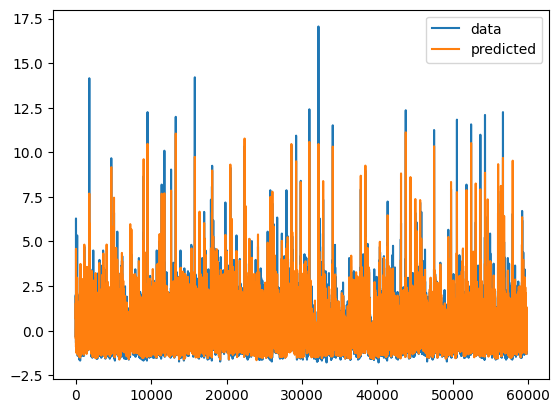

In [ ]:
## test it (with a net that was trained below in this notebook)
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=True)

### plt_preds_multivar_sliced

In [ ]:
def plot_preds_multivar_sliced(slce: slice, pred_y, true_y, input_len, _axes=None, _plt_title=None):
    # FIRST_N = 100
    axes = _axes
    if axes is None: axes = plt.gca()
    _px = np.arange(len(pred_y))  # DO NOT offset pred's x for graph plot BECAUSE MULTIVARIATE, pred_y lines up with true_y exactly
    axes.plot(np.arange(len(true_y))[slce], true_y[slce], label='data')
    axes.plot(_px[slce], pred_y[slce], label='predicted')
    if _plt_title: axes.set_title(_plt_title)
    else: axes.set_title(f'plot preds just {slce}')
    axes.legend()
    if _axes is None: plt.show()

In [ ]:
slice(10,20) == slice(slice(10,20).start, slice(10,20).stop, slice(10,20).step)

True

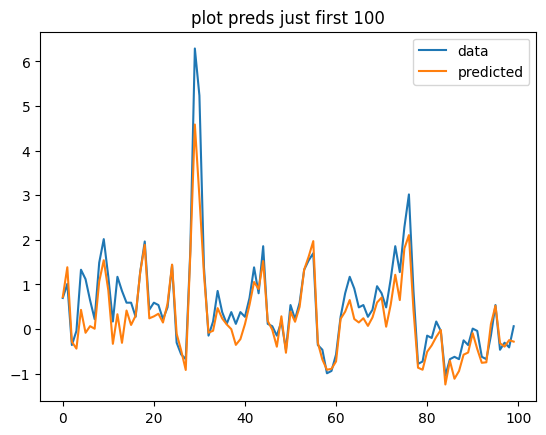

In [ ]:
# extra plot of just the first 100
# plot_preds_multivar_firstN(100, pred_y, true_y, input_len)
plot_preds_multivar_sliced(slice(0, 100), pred_y, true_y, input_len, _plt_title='plot preds just first 100')

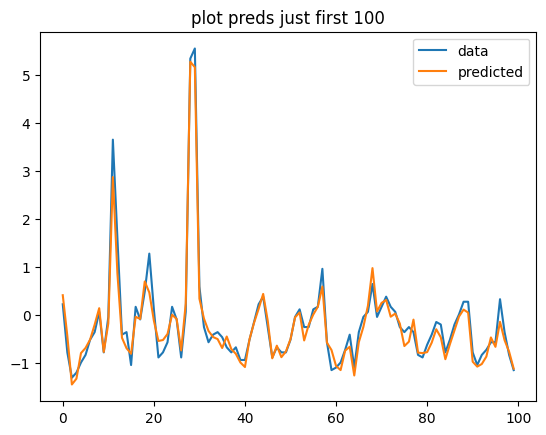

In [ ]:
plot_preds_multivar_sliced(slice(0, 100), pred_y, true_y, input_len, _plt_title='plot preds just first 100')

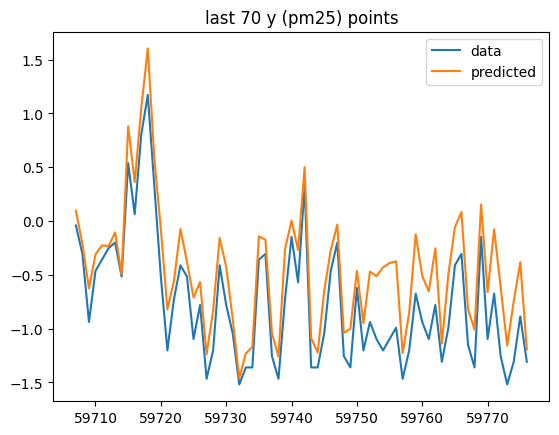

In [ ]:
plot_preds_multivar_sliced(slice(-70,None), pred_y, true_y, input_len,
        _plt_title='last 70 y (pm25) points')

## secs_to_hhmmss (hh:mm:ss.ms)

In [ ]:
# from math import floor
def secs_to_hhmmss(seconds):
  return '{:02.0f}:{:02.0f}:{:02.3f}'.format(seconds//3600, seconds//60%60, seconds%60)

In [ ]:
# test secs_to_hhmmss
_timediff = 9317.4914
print( '{:.4f}, {:.4f}, {:.4f}'.format(_timediff/3600, _timediff/60, _timediff) )
print( '{:.4f}, {:.4f}, {:.4f}'.format(_timediff/3600, _timediff/60%60, _timediff%3600) )
print( '{:02.0f}:{:02.0f}:{:02.3f}'.format(_timediff//3600, _timediff//60%60, _timediff%60) )
print( '{:02.0f}:{:02.0f}:{:02.3f}'.format((_timediff+1e6)//3600, (_timediff+1e6)//60%60, (_timediff+1e6)%60) )
print( secs_to_hhmmss(_timediff) )
print( secs_to_hhmmss(_timediff+1e6) )

2.5882, 155.2915, 9317.4914
2.5882, 35.2915, 2117.4914
02:35:17.491
280:21:57.491
02:35:17.491
280:21:57.491


## create_trainer, create_loss_fn

create_trainer(net, lr, type, clip_grad)

create_loss_fn()

In [ ]:
def create_trainer(net, sgdtype='sgd', lr=0.1, clip_grad=5):
  '''if `clip_grad` param is passed `None`, then the clip_gradient arg will not be passed to gluon.Trainer'''
  if clip_grad is None:
    return gluon.Trainer(net.collect_params(), sgdtype, {'learning_rate': lr})
  return gluon.Trainer(net.collect_params(), sgdtype, {'learning_rate': lr, 'clip_gradient': clip_grad})

In [ ]:
def create_loss_fn():
  return gluon.loss.L2Loss()  # L2Loss is mean squared error (MSE)

# Several basic SimpleDataSet trainings

These are simple examples of how I create a basic network and run it through train(...) for reference.

More complex and relevant examples later

In [ ]:
epochs = 500  # with the create_net(32, 3) it will take maybe 9-10 minutes to train

## Sine, no noise,

plotting graph of the raw data points data.x


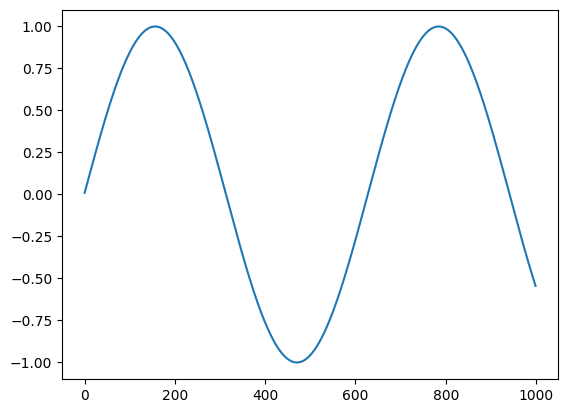

In [ ]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential0_ (
  Parameter sequential0_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential0_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/500], loss: 0.2527803 , 1.1216 sec | validate loss: 0.2059974 , 0.2171 sec
epoch [2/500], loss: 0.2107848 , 1.5653 sec | validate loss: 0.1109844 , 0.3782 sec
epoch [3/500], loss: 0.0961789 , 1.6578 sec | validate loss: 0.0146948 , 0.3708 sec
epoch [4/500], loss: 0.0030873 , 2.3029 sec | validate loss: 0.0009148 , 0.8455 sec
epoch [5/50

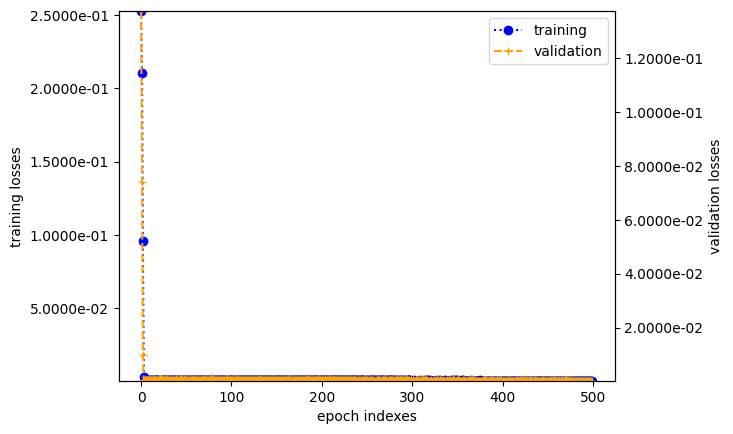

debug: testing:  tlosses min 0.000479893686160329
debug: testing:  tlosses max 0.25278030498810977
debug: validate: vlosses min 0.00032418972784919916
debug: validate: vlosses max 0.13733159004429002


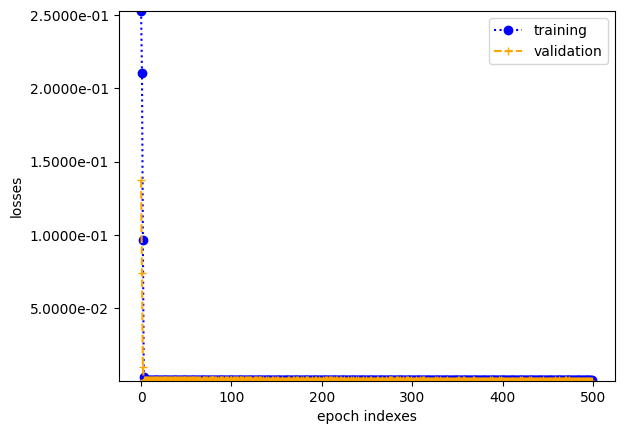

In [ ]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=epochs, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

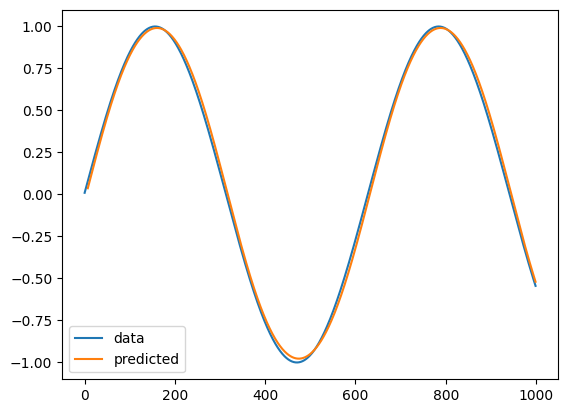

In [ ]:
plot_preds_over_data(data, net, _debug=False)

## Sine, some random noise,

plotting graph of the raw data points data.x


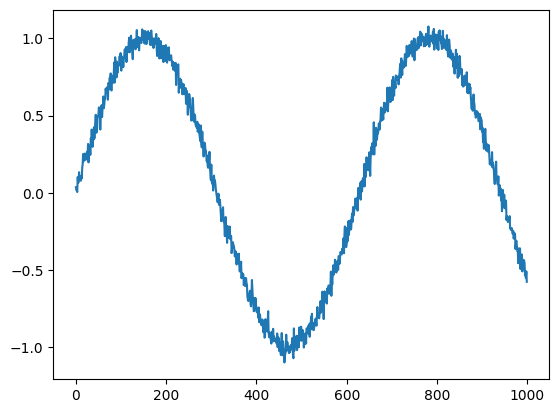

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential1_ (
  Parameter sequential1_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential1_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/500], loss: 0.2577977 , 0.7733 sec | validate loss: 0.1893361 , 0.1734 sec
epoch [2/500], loss: 0.2296509 , 0.7731 sec | validate loss: 0.1634185 , 0.1736 sec
epoch [3/500], loss: 0.1346830 , 0.7765 sec | validate loss: 0.0513837 , 0.1705 sec
epoch [4/500], loss: 0.0133651 , 0.7863 sec | validate loss: 0.0020484 , 0.1694 sec
epoch [5/50

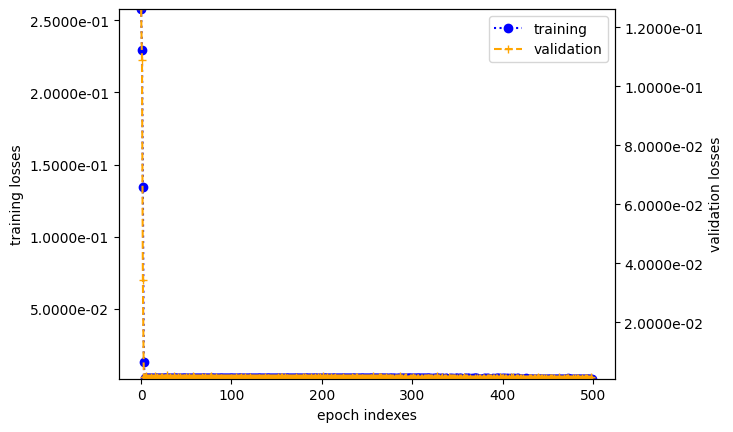

debug: testing:  tlosses min 0.0014194574934344845
debug: testing:  tlosses max 0.25779765445165637
debug: validate: vlosses min 0.0009229426475515995
debug: validate: vlosses max 0.1262240398953163


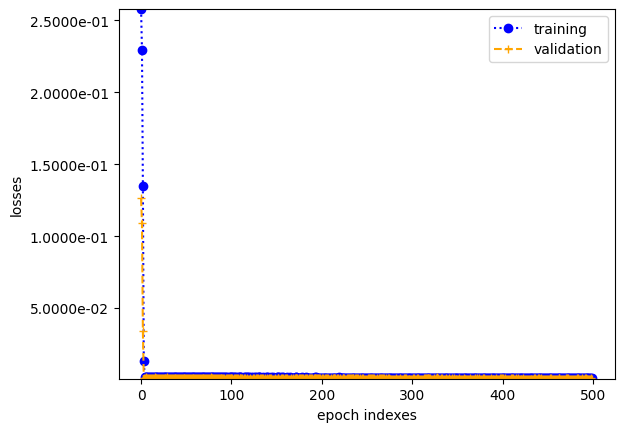

In [ ]:
data = SimpleDataSet('sine')

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)


#########


net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=500, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

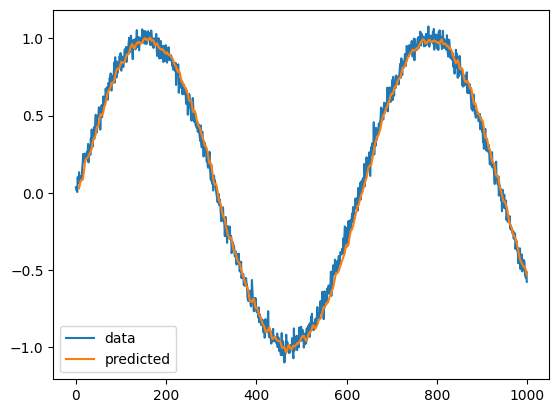

In [ ]:
plot_preds_over_data(data, net, _debug=False)

## Exponential, no noise. (Note how the dataset's datapoints are in [0,10000], not a sine's [-1,1] also centered at 0)

plotting graph of the raw data points data.x


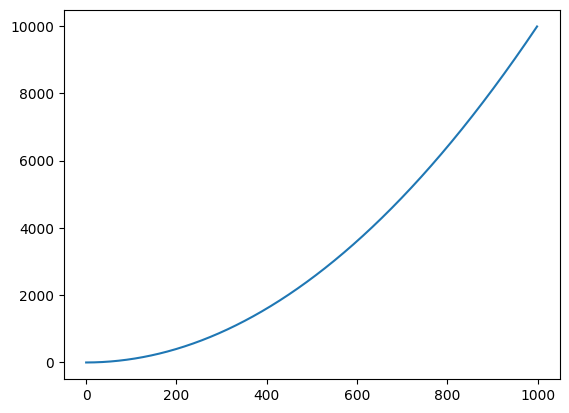

In [ ]:
data = SimpleDataSet('exp', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential2_ (
  Parameter sequential2_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential2_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential2_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential2_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential2_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential2_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential2_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/500], loss: 1372498.5221809 , 0.7903 sec | validate loss: 23801878.2582521 , 0.1852 sec
epoch [2/500], loss: 1369599.1314945 , 0.8448 sec | validate loss: 23782011.3698212 , 0.1908 sec
epoch [3/500], loss: 1364981.8035507 , 1.2469 sec | validate loss: 23751082.0847704 , 0.2621 sec
epoch [4/500], loss: 1358104.9576534 , 1.0081 sec | vali

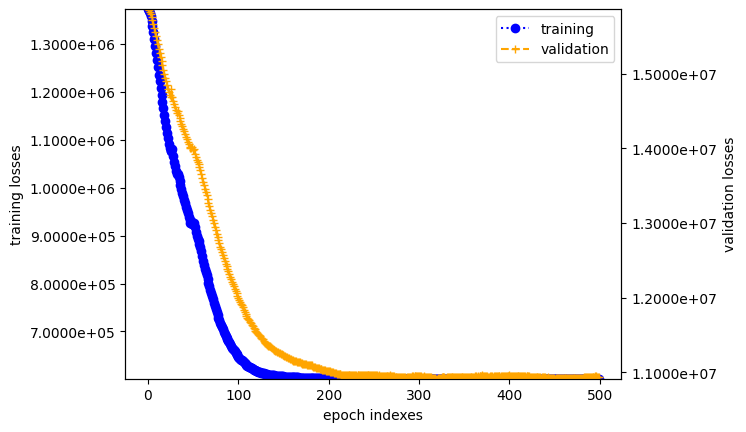

debug: testing:  tlosses min 601485.1891279854
debug: testing:  tlosses max 1372498.5221809358
debug: validate: vlosses min 10912456.487459341
debug: validate: vlosses max 15867918.838834722


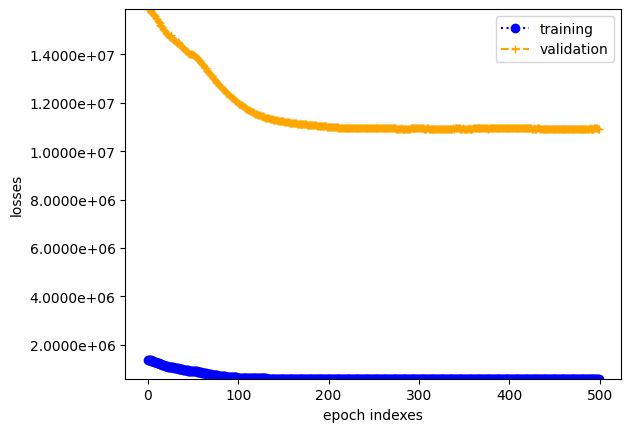

In [ ]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=500, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

triggered batch extra
1000
debug: first batch: [array([[0.0025, 0.0225, 0.0625, 0.1225, 0.2025, 0.3025, 0.4225],
       [0.0225, 0.0625, 0.1225, 0.2025, 0.3025, 0.4225, 0.5625],
       [0.0625, 0.1225, 0.2025, 0.3025, 0.4225, 0.5625, 0.7225],
       [0.1225, 0.2025, 0.3025, 0.4225, 0.5625, 0.7225, 0.9025],
       [0.2025, 0.3025, 0.4225, 0.5625, 0.7225, 0.9025, 1.1025],
       [0.3025, 0.4225, 0.5625, 0.7225, 0.9025, 1.1025, 1.3225],
       [0.4225, 0.5625, 0.7225, 0.9025, 1.1025, 1.3225, 1.5625],
       [0.5625, 0.7225, 0.9025, 1.1025, 1.3225, 1.5625, 1.8225]]), array([[0.5625],
       [0.7225],
       [0.9025],
       [1.1025],
       [1.3225],
       [1.5625],
       [1.8225],
       [2.1025]])]
debug: first 9 data.x: [0.0025 0.0225 0.0625 0.1225 0.2025 0.3025 0.4225 0.5625 0.7225]
debug: last batch: [array([[9850.5625, 9870.4225, 9890.3025, 9910.2025, 9930.1225, 9950.0625,
        9970.0225],
       [9870.4225, 9890.3025, 9910.2025, 9930.1225, 9950.0625, 9970.0225,
        9990.002

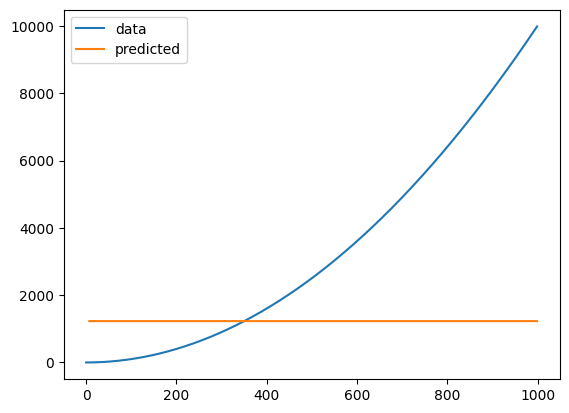

In [ ]:
plot_preds_over_data(data, net, _debug=True)

## Sine, no noise, smaller learning rate (change 0.1 down to 0.01)

plotting graph of the raw data points data.x


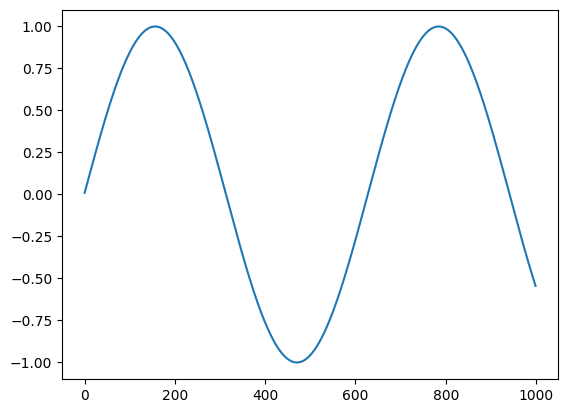

In [ ]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential3_ (
  Parameter sequential3_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential3_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/500], loss: 0.2581356 , 0.8464 sec | validate loss: 0.2024485 , 0.1750 sec
epoch [2/500], loss: 0.2567783 , 0.7851 sec | validate loss: 0.2004937 , 0.1702 sec
epoch [3/500], loss: 0.2552276 , 0.8222 sec | validate loss: 0.1978021 , 0.1692 sec
epoch [4/500], loss: 0.2536367 , 0.8107 sec | validate loss: 0.1954064 , 0.1736 sec
epoch [5/50

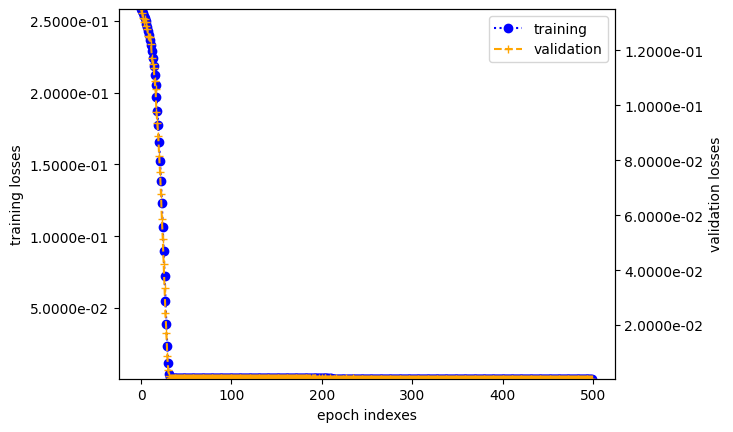

debug: testing:  tlosses min 0.0007240312937826141
debug: testing:  tlosses max 0.25813558775247764
debug: validate: vlosses min 0.0004908337849169952
debug: validate: vlosses max 0.13496564803690717


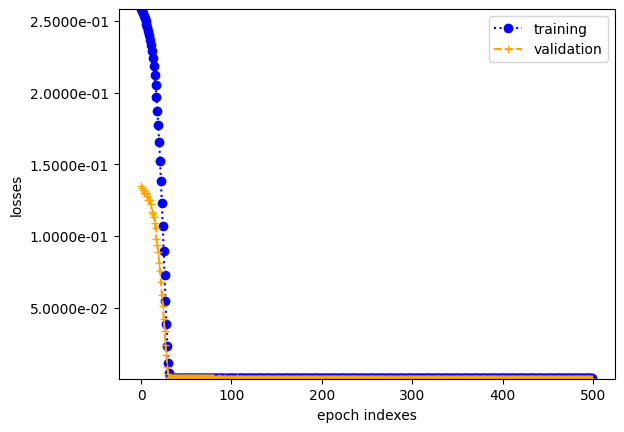

In [ ]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net, lr=0.01)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=500, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

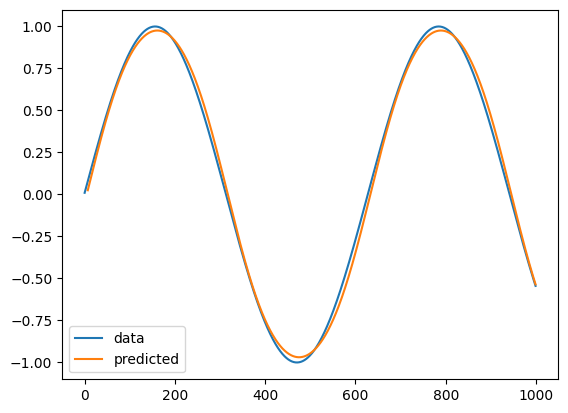

In [ ]:
plot_preds_over_data(data, net, _debug=False)

may need more epochs to pass the quality of the lr=0.1 Sine no-noise

## Sine with lr 0.001, epochs 4000, to compare

Trying 4000 epochs with slow learning rate 0.001 on the sine SimpleDataSet;

took much longer to train but produced similar results to earlier, faster lr training sessions above.

plotting graph of the raw data points data.x


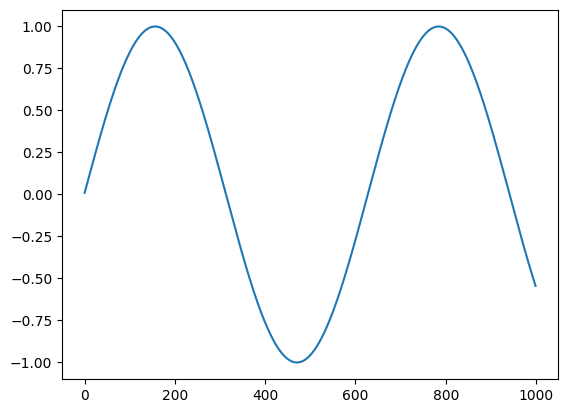

In [ ]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

### test lr 0.001 for 4000 epochs

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential1_ (
  Parameter sequential1_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential1_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential1_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/4000], loss: 0.2560264 , 1.4196 sec | validate loss: 0.2025103 , 0.2806 sec
epoch [2/4000], loss: 0.2558870 , 0.9528 sec | validate loss: 0.2021299 , 0.1854 sec
epoch [3/4000], loss: 0.2557426 , 0.8079 sec | validate loss: 0.2022472 , 0.1671 sec
epoch [4/4000], loss: 0.2555971 , 0.8006 sec | validate loss: 0.2019259 , 0.1640 sec
epoch [

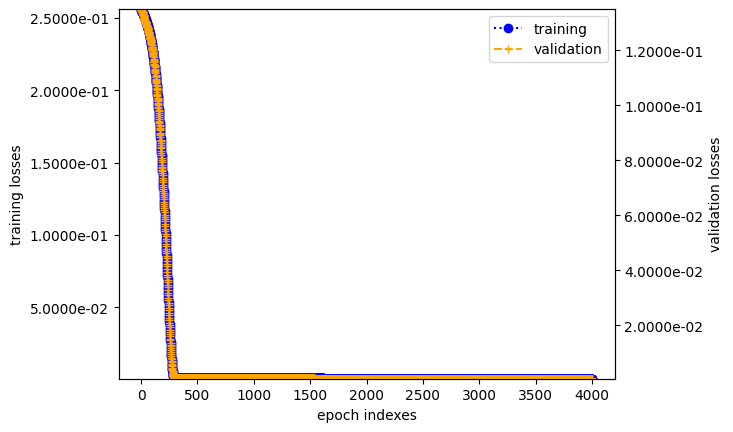

debug: testing:  tlosses min 0.0007581708842519297
debug: testing:  tlosses max 0.2560264109652325
debug: validate: vlosses min 0.000508459218789166
debug: validate: vlosses max 0.13500689667173812


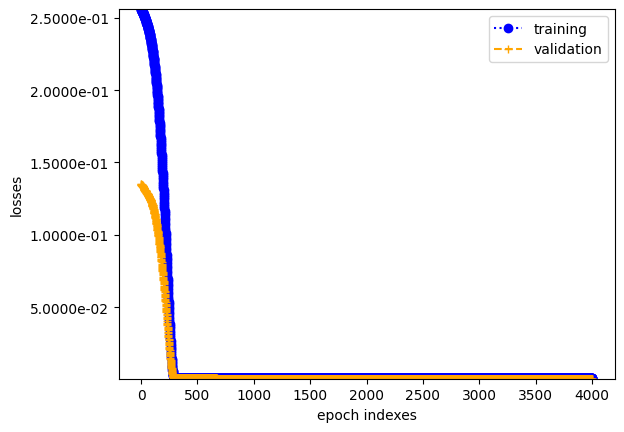

In [ ]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net, lr=0.001)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=4000, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

debug: testing:  tlosses min 0.0007581708842519297
debug: testing:  tlosses max 0.2560264109652325
debug: validate: vlosses min 0.000508459218789166
debug: validate: vlosses max 0.13500689667173812


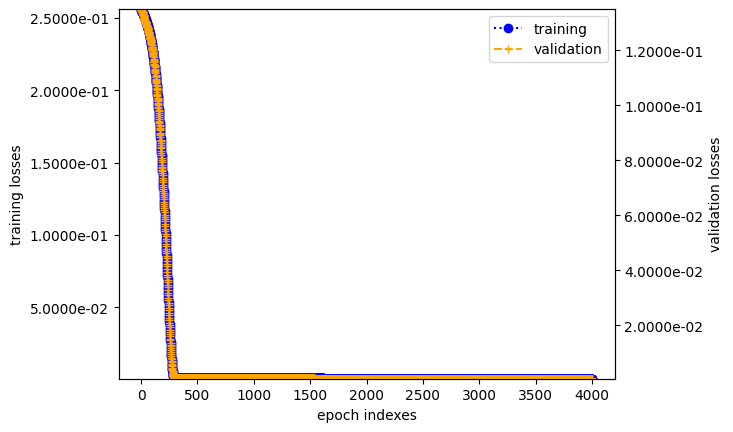

debug: testing:  tlosses min 0.0007581708842519297
debug: testing:  tlosses max 0.2560264109652325
debug: validate: vlosses min 0.000508459218789166
debug: validate: vlosses max 0.13500689667173812


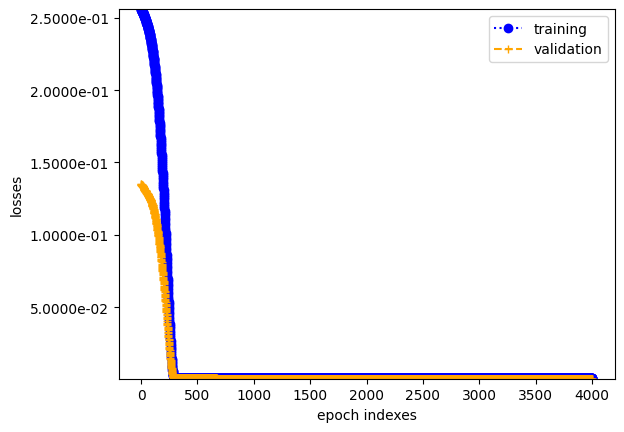

In [ ]:
# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

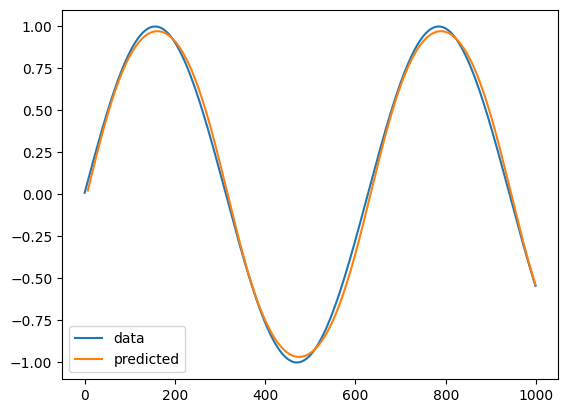

In [ ]:
plot_preds_over_data(data, net, _debug=False)

# How to save and re-import model parameters

Example using the simple Sine wave dataset

First, have a trained model to save, here we're training one:

plotting graph of the raw data points data.x


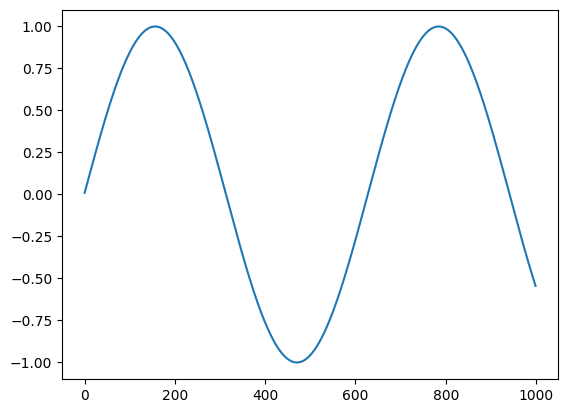

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential7_ (
  Parameter sequential7_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential7_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/20], loss: 0.2512857 , 1.0326 sec | validate loss: 0.1871684 , 0.2063 sec
epoch [2/20], loss: 0.2059948 , 1.0028 sec | validate loss: 0.1471612 , 0.2240 sec
epoch [3/20], loss: 0.0851285 , 1.0663 sec | validate loss: 0.0059490 , 0.3108 sec
epoch [4/20], loss: 0.0019209 , 1.5169 sec | validate loss: 0.0013153 , 0.2830 sec
epoch [5/20], l

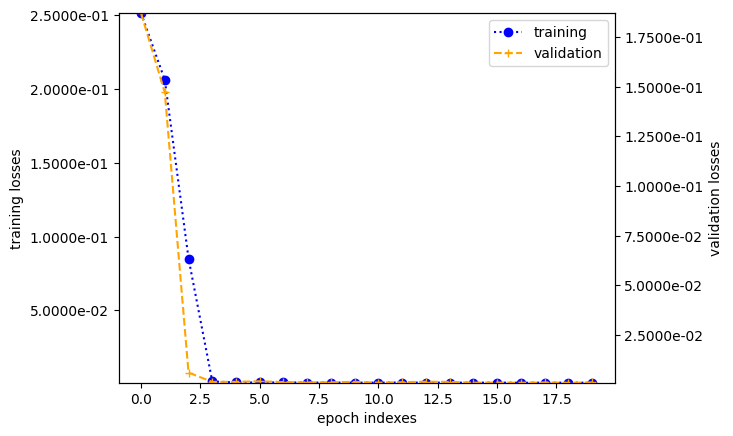

debug: testing:  tlosses min 0.0010512533684695416
debug: testing:  tlosses max 0.251285729586488
debug: validate: vlosses min 0.0008791668586158947
debug: validate: vlosses max 0.1871684165582219


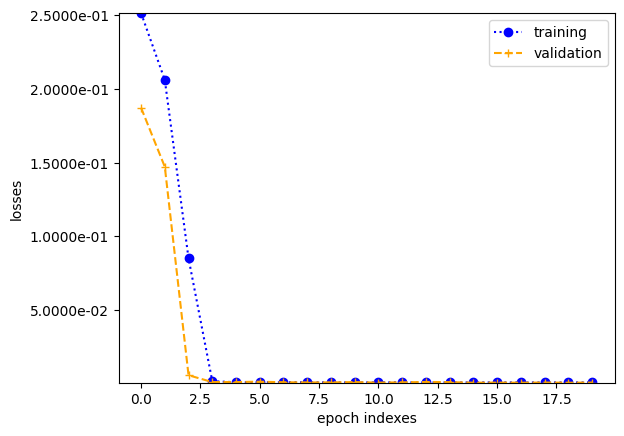

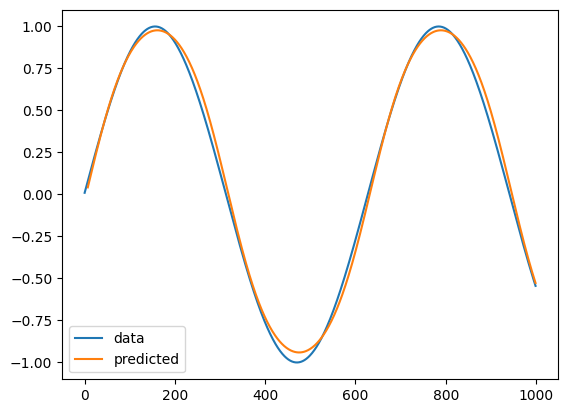

In [ ]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

#--------

net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=20, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

#--------

plot_preds_over_data(data, net, _debug=False)

Next, save and import this trained model's parameters with this example.

Notice the plotted predictions are the same.

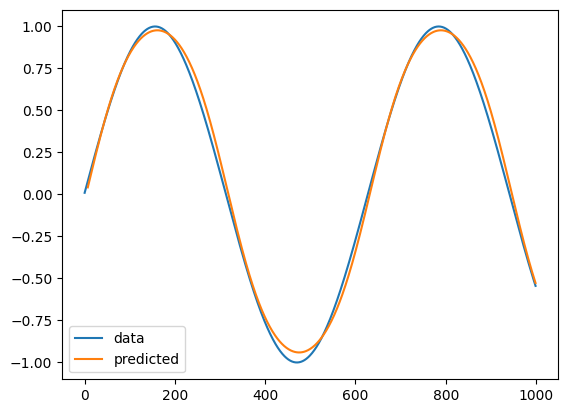

In [ ]:
# test saving net params
file_name = "net.params"
net.save_parameters(file_name)

# copy out to drive and back
!cp 'net.params' 'drive/MyDrive/Colab Notebooks/net.params'
!cp 'drive/MyDrive/Colab Notebooks/net.params' .

# test loading net params into new created net (of same network shape!)
net = create_net(hidden_size=32, num_layers=3)
net.load_parameters(file_name, ctx=ctx)
plot_preds_over_data(data, net, _debug=False)

# Feeding the 11-feature city data through a net

### CityDataSet does PM 2.5 as the Y to predict

CityDataSet: concatenated train X.shape: (53015, 7, 11)
CityDataSet: concatenated train y.shape: (53015, 1)
CityDataSet: concatenated validate X.shape: (6789, 7, 11)
CityDataSet: concatenated validate y.shape: (6789, 1)
plotting graph of the (standardized) training y (pm25) data points traindata.y
plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y


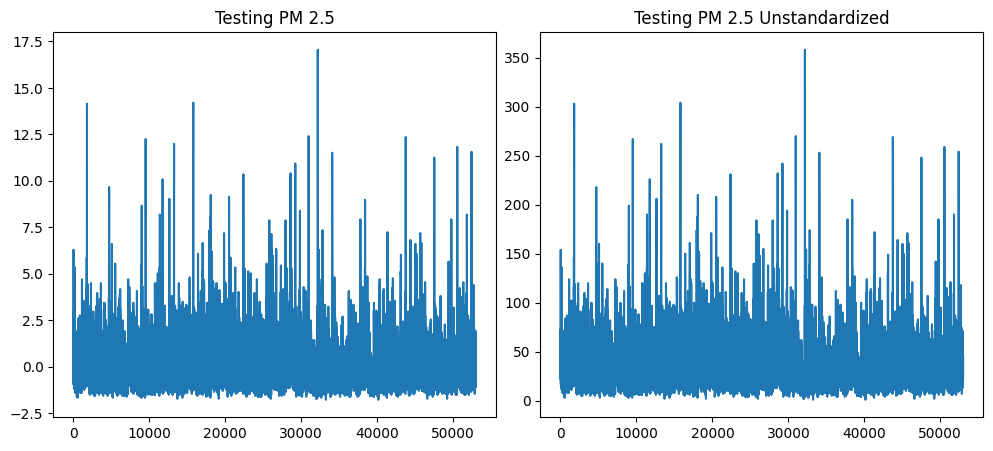

plotting graph of the (std) validation y (pm25) data points valdata.y


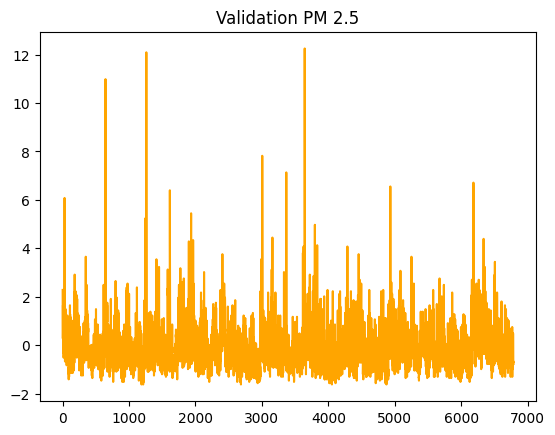

In [ ]:
# traindata = CityDataSet(city_seqs, train_cities, train=True)
# valdata = CityDataSet(city_seqs, valid_cities, train=False)
data = CityDataSet(city_seqs, train_cities, valid_cities)

fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

print('plotting graph of the (standardized) training y (pm25) data points traindata.y')
# axes1.plot(traindata.y)
axes1.plot(data.trainy)
axes1.set_title('Testing PM 2.5')
# plt.show()
print('plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y')
# axes2.plot([undo_pm25_standardization(y) for y in traindata.y])
axes2.plot([undo_pm25_standardization(y) for y in data.trainy])
axes2.set_title('Testing PM 2.5 Unstandardized')
plt.show()

print('plotting graph of the (std) validation y (pm25) data points valdata.y')
# plt.plot(valdata.y, color='orange')
plt.plot(data.validy, color='orange')
plt.title('Validation PM 2.5')
plt.show()

# plt.plot(np.concatenate((data.trainy,data.validy)), color='orange')
# plt.title('All PM 2.5')
# plt.show()

# train_dataloader: gluon.data.DataLoader = traindata.get_dataloader()
# val_dataloader: gluon.data.DataLoader = valdata.get_dataloader()
train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

#### test_net_1

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential5_ (
  Parameter sequential5_lstm0_l0_i2h_weight (shape=(128, 11), dtype=float32)
  Parameter sequential5_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential5_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential5_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential5_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential5_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential5_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/100], loss: 0.2041702 , 88.1999 sec | validate loss: 0.0897490 , 3.3915 sec
epoch [2/100], loss: 0.0887461 , 92.9966 sec | validate loss: 0.0799210 , 3.2339 sec
epoch [3/100], loss: 0.0807587 , 93.8393 sec | validate loss: 0.0696579 , 3.6778 sec
epoch [4/100], loss: 0.0760387 , 101.1210 sec | validate loss: 0.0683821 , 3.1387 sec
epoch

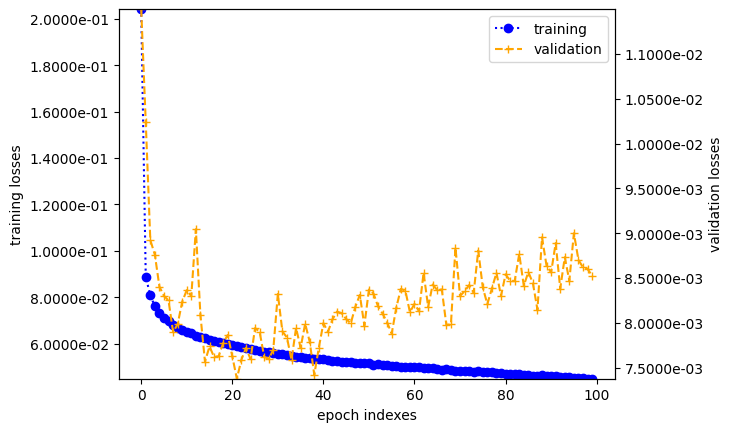

debug: testing:  tlosses min 0.04483523347648932
debug: testing:  tlosses max 0.20417019664321906
debug: validate: vlosses min 0.00737874969580691
debug: validate: vlosses max 0.011497947993216424


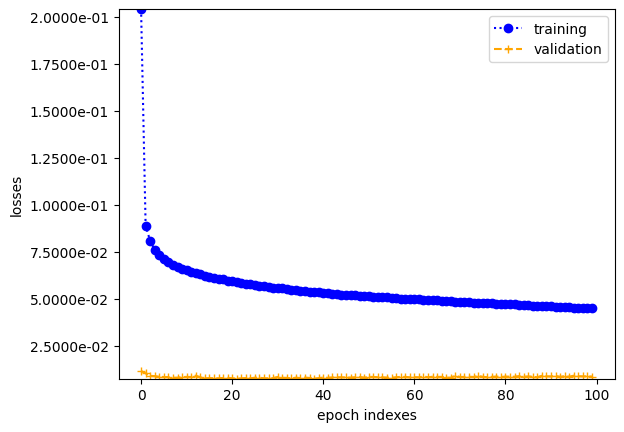

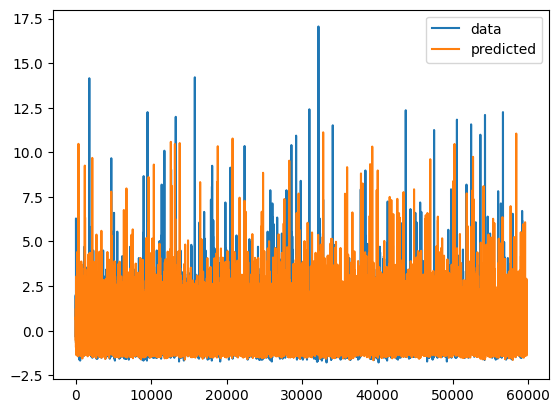

([array(0.6503216),
  array(0.85314393),
  array(0.7516867),
  array(-0.05469066),
  array(0.7014264),
  array(1.2459233),
  array(-0.54927206),
  array(-0.546237),
  array(0.7726517),
  array(-0.75242174),
  array(-0.50081253),
  array(-0.07772982),
  array(0.5122355),
  array(-0.4193895),
  array(1.7805675),
  array(0.18438053),
  array(-0.17213559),
  array(-0.35980475),
  array(-0.93777),
  array(0.04581302),
  array(-0.13866901),
  array(-0.6384294),
  array(-0.6584395),
  array(0.9437045),
  array(0.91070265),
  array(-1.2635201),
  array(0.5722984),
  array(0.73236966),
  array(-0.02760297),
  array(-0.22323847),
  array(0.97965384),
  array(-1.354258),
  array(0.8782141),
  array(2.8418155),
  array(-0.23210919),
  array(-0.59721935),
  array(-0.13001025),
  array(0.61310744),
  array(0.27318293),
  array(-0.47948027),
  array(0.8833197),
  array(-0.4606197),
  array(-0.8440918),
  array(-0.21704018),
  array(0.05441189),
  array(0.69705975),
  array(-0.99218094),
  array(-0.23

In [ ]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=100, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec (hh:mm:ss {})'.format(_timediff, secs_to_hhmmss(_timediff)))

# save net params in case Google Colab session ends
file_name = "params/test_net_1.params"
net.save_parameters(file_name)
# copy out to drive and back
!cp 'params/test_net_1.params' 'drive/MyDrive/Colab Notebooks/params/test_net_1.params'
!cp 'drive/MyDrive/Colab Notebooks/params/test_net_1.params' ./params
print(f'saved parameters to "{file_name}"')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

#--------

# plot_preds_over_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=False)

debug: testing:  tlosses min 0.04483523347648932
debug: testing:  tlosses max 0.20417019664321906
debug: validate: vlosses min 0.00737874969580691
debug: validate: vlosses max 0.011497947993216424


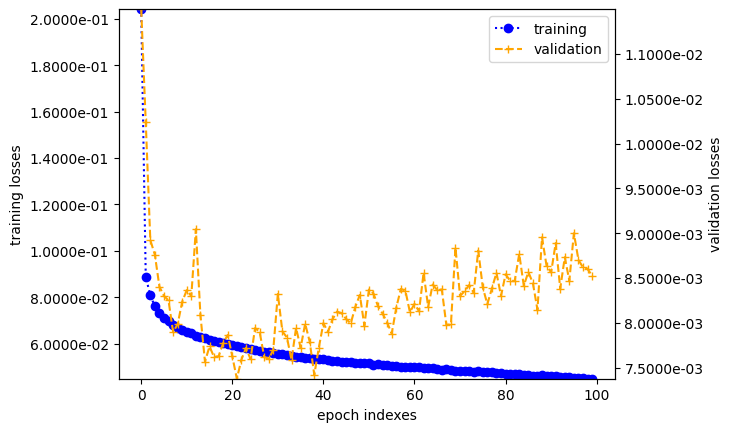

debug: testing:  tlosses min 0.04483523347648932
debug: testing:  tlosses max 0.20417019664321906
debug: validate: vlosses min 0.00737874969580691
debug: validate: vlosses max 0.011497947993216424


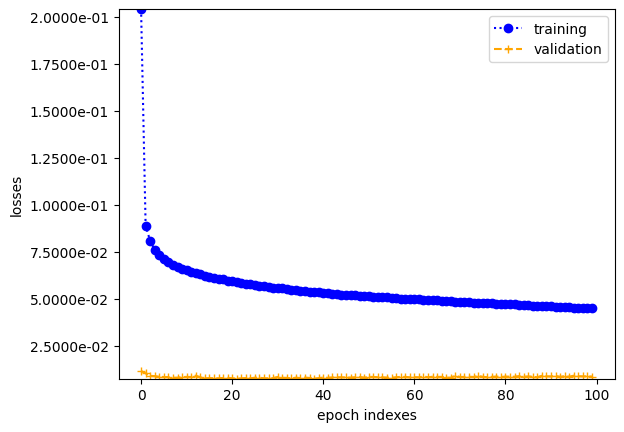

In [ ]:
# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

len(data_y_points), _input_len + len(pred_y): 59804 , 59811
debug: len pred_y:    59804
debug: len _px range: 59804
debug: first 8 of data_y_points: [array([0.69724245]), array([1.01383191]), array([-0.35805577]), array([-0.0414663]), array([1.33042138]), array([1.11936173]), array([0.64447754]), array([0.22235825])]
debug: first 8 of pred_y:        [array(0.71969664), array(1.386162), array(-0.28495926), array(-0.43803406), array(0.43061396), array(-0.08283925), array(0.06557685), array(0.00803006)]
debug: last 8 of  data_y_points: [array([0.48618281]), array([-0.30529086]), array([-0.62188032]), array([-0.72741014]), array([-0.67464523]), array([-0.67464523]), array([-0.67464523]), array([-0.78017505])]
debug: last 8 of  pred_y:        [array(0.4817813), array(-0.06847155), array(-0.63309836), array(-0.6063075), array(-0.33377254), array(-0.33878064), array(-0.45593548), array(-0.6510607)]
debug: last 8 of _px:  [59796 59797 59798 59799 59800 59801 59802 59803]


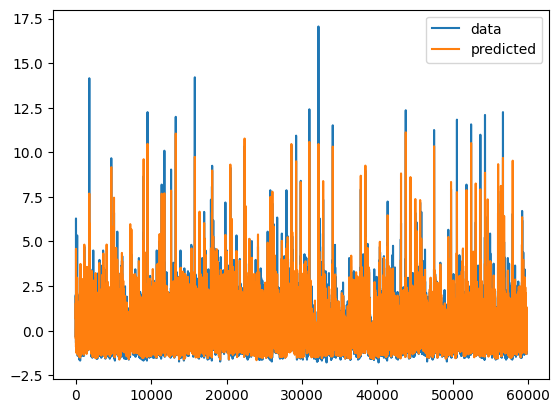

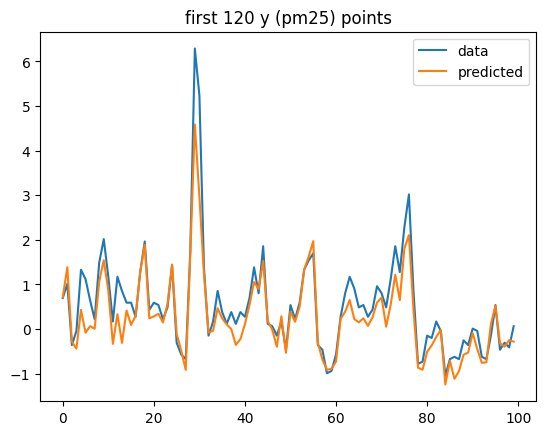

In [ ]:
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=True)

# # extra plot of just the first 100 y (pm25) points, to see them clearer
# _FIRST_N = 100
# axes = plt.gca()
# _px = input_len + np.arange(len(pred_y))  # offset pred's x for graph plot
# axes.plot(range(_FIRST_N), true_y[:_FIRST_N], label='data')
# axes.plot(_px[:_FIRST_N-input_len], pred_y[:_FIRST_N-input_len], label='predicted')
# plt.legend()
# plt.show()
# plot_preds_multivar_firstN(120, pred_y, true_y, input_len,
#         _plt_title='first 120 y (pm25) points')
plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len,
        _plt_title='first 120 y (pm25) points')

### test_net_1 with save params every 20

In [ ]:
train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential15_ (
  Parameter sequential15_lstm0_l0_i2h_weight (shape=(128, 11), dtype=float32)
  Parameter sequential15_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential15_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential15_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential15_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential15_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential15_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/100], loss: 0.2048064 , 91.7331 sec | validate loss: 0.0854271 , 3.4194 sec
epoch [2/100], loss: 0.0869776 , 91.8022 sec | validate loss: 0.0762409 , 3.2475 sec
epoch [3/100], loss: 0.0783194 , 92.2285 sec | validate loss: 0.0743455 , 3.4021 sec
epoch [4/100], loss: 0.0744778 , 95.0104 sec | validate loss: 0.0680696 , 4.6960 se

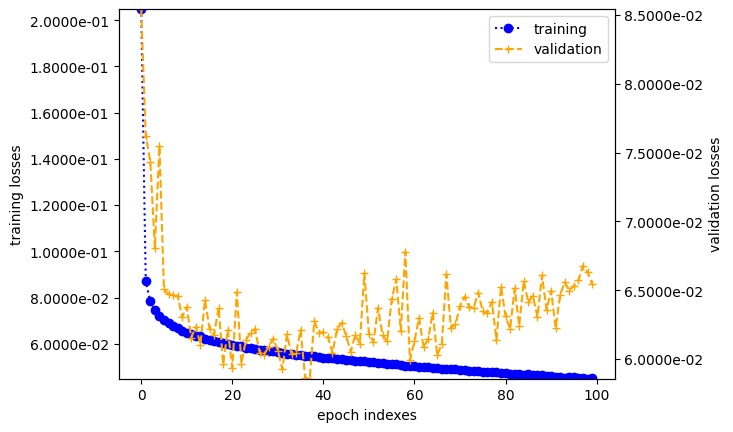

debug: testing:  tlosses min 0.044881957037551864
debug: testing:  tlosses max 0.20480644066387493
debug: validate: vlosses min 0.05857018756283446
debug: validate: vlosses max 0.08542709244281012


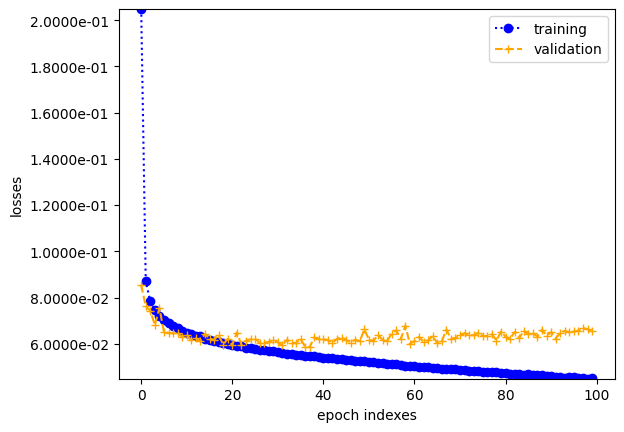

In [ ]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=100, test_dataloader=val_dataloader, save_every=20, save_filename_template='test_net_1_e{}.params', _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec (hh:mm:ss {})'.format(_timediff, secs_to_hhmmss(_timediff)))

save_net_to_file(net, 'test_net_1_e100.params')

# # save net params in case Google Colab session ends
# file_name = "params/test_net_1.params"
# net.save_parameters(file_name)
# # copy out to drive and back
# !cp 'params/test_net_1.params' 'drive/MyDrive/Colab Notebooks/params/test_net_1.params'
# !cp 'drive/MyDrive/Colab Notebooks/params/test_net_1.params' ./params
# print(f'saved parameters to "{file_name}"')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

len(data_y_points), _input_len + len(pred_y): 59804 , 59811
debug: len pred_y:    59804
debug: len _px range: 59804
debug: first 8 of data_y_points: [array([0.69724245]), array([1.01383191]), array([-0.35805577]), array([-0.0414663]), array([1.33042138]), array([1.11936173]), array([0.64447754]), array([0.22235825])]
debug: first 8 of pred_y:        [array(0.6624757), array(1.3801491), array(-0.39070892), array(-0.30309033), array(0.36600494), array(-0.1262945), array(0.02414536), array(-0.01366305)]
debug: last 8 of  data_y_points: [array([0.48618281]), array([-0.30529086]), array([-0.62188032]), array([-0.72741014]), array([-0.67464523]), array([-0.67464523]), array([-0.67464523]), array([-0.78017505])]
debug: last 8 of  pred_y:        [array(0.8039464), array(0.14329493), array(-0.64918244), array(-0.64600194), array(-0.3812647), array(-0.411546), array(-0.57692325), array(-0.76832056)]
debug: last 8 of _px:  [59796 59797 59798 59799 59800 59801 59802 59803]


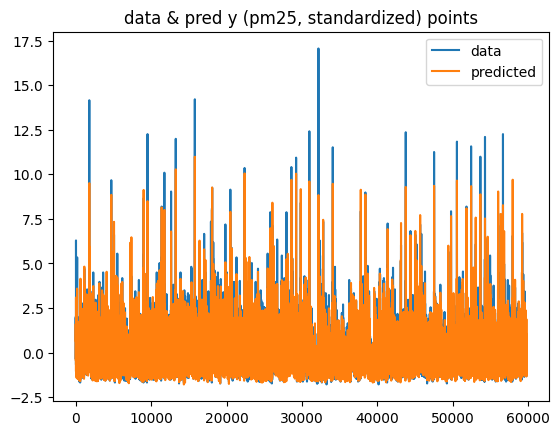

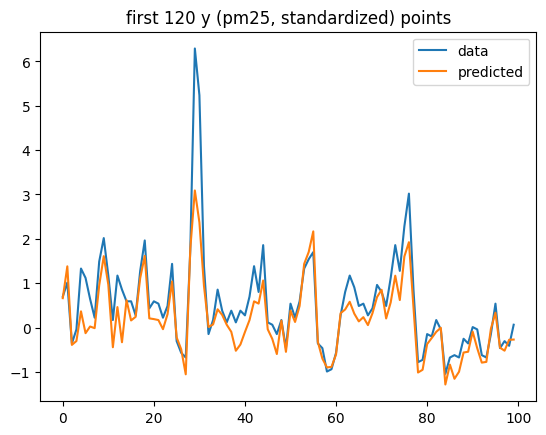

In [ ]:
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _plt_title='data & pred y (pm25, standardized) points', _debug=True)

# plot_preds_multivar_firstN(120, pred_y, true_y, input_len,
#         _plt_title='first 120 y (pm25, standardized) points')
plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len,
        _plt_title='first 120 y (pm25, standardized) points')

In [ ]:
train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential10_ (
  Parameter sequential10_lstm0_l0_i2h_weight (shape=(128, 11), dtype=float32)
  Parameter sequential10_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/5], loss: 0.1934793 , 127.8066 sec | validate loss: 0.0879030 , 3.5083 sec
epoch [2/5], loss: 0.0868475 , 94.0485 sec | validate loss: 0.0789749 , 3.4871 sec
epoch [3/5], loss: 0.0783654 , 91.5660 sec | validate loss: 0.0697937 , 5.0756 sec
epoch [4/5], loss: 0.0741066 , 96.5622 sec | validate loss: 0.0687691 , 4.4993 sec
epoch

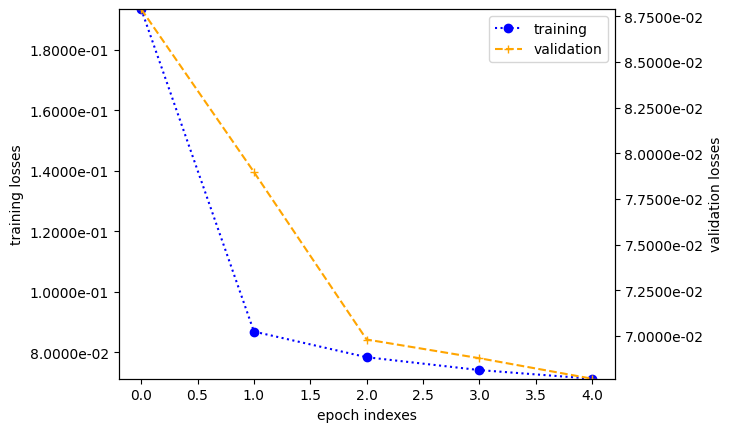

debug: testing:  tlosses min 0.07124815308565793
debug: testing:  tlosses max 0.19347926848012129
debug: validate: vlosses min 0.06764467678924264
debug: validate: vlosses max 0.0879030147303806


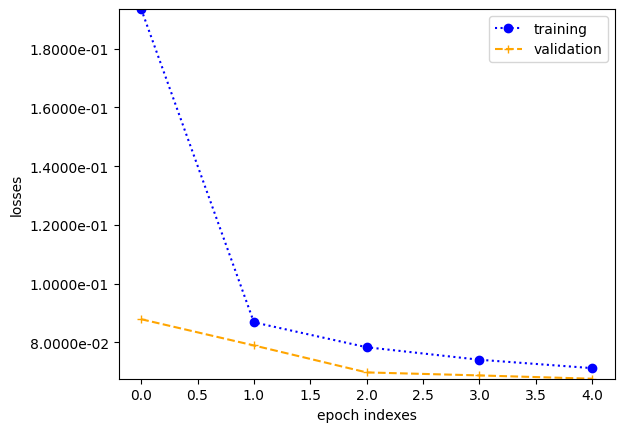

In [ ]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=5, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec (hh:mm:ss {})'.format(_timediff, secs_to_hhmmss(_timediff)))

# save net params in case Google Colab session ends
file_name = "params/test_net_1.params"
net.save_parameters(file_name)
# copy out to drive and back
!cp 'params/test_net_1.params' 'drive/MyDrive/Colab Notebooks/params/test_net_1.params'
!cp 'drive/MyDrive/Colab Notebooks/params/test_net_1.params' ./params
print(f'saved parameters to "{file_name}"')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

len(data_y_points), _input_len + len(pred_y): 59804 , 59811
debug: len pred_y:    59804
debug: len _px range: 59804
debug: first 8 of data_y_points: [array([0.69724245]), array([1.01383191]), array([-0.35805577]), array([-0.0414663]), array([1.33042138]), array([1.11936173]), array([0.64447754]), array([0.22235825])]
debug: first 8 of pred_y:        [array(0.7324592), array(1.3007123), array(-0.383932), array(-0.54646474), array(0.21158189), array(-0.09052263), array(0.04908571), array(-0.04605858)]
debug: last 8 of  data_y_points: [array([0.48618281]), array([-0.30529086]), array([-0.62188032]), array([-0.72741014]), array([-0.67464523]), array([-0.67464523]), array([-0.67464523]), array([-0.78017505])]
debug: last 8 of  pred_y:        [array(0.61112595), array(-0.11418591), array(-0.6238285), array(-0.60321826), array(-0.38304722), array(-0.3864665), array(-0.5071488), array(-0.6977465)]
debug: last 8 of _px:  [59796 59797 59798 59799 59800 59801 59802 59803]


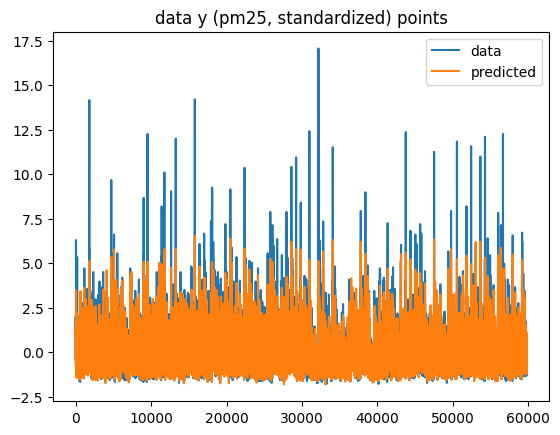

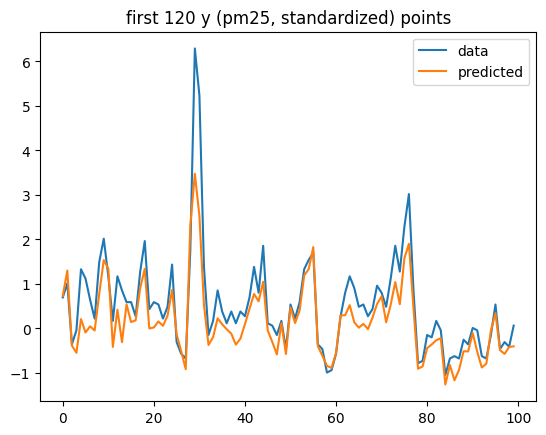

In [ ]:
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _plt_title='data & pred y (pm25, standardized) points', _debug=True)

# plot_preds_multivar_firstN(120, pred_y, true_y, input_len,
#         _plt_title='first 120 y (pm25, standardized) points')
plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len,
        _plt_title='first 120 y (pm25, standardized) points')

### test_net_2, disabling gradient clipping in trainer and train(...)

CityDataSet: concatenated train X.shape: (53095, 7, 11)
CityDataSet: concatenated train y.shape: (53095, 1)
CityDataSet: concatenated validate X.shape: (6682, 7, 11)
CityDataSet: concatenated validate y.shape: (6682, 1)
plotting graph of the (standardized) training y (pm25) data points traindata.y
plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y
plotting graph of the (std) validation y (pm25) data points valdata.y


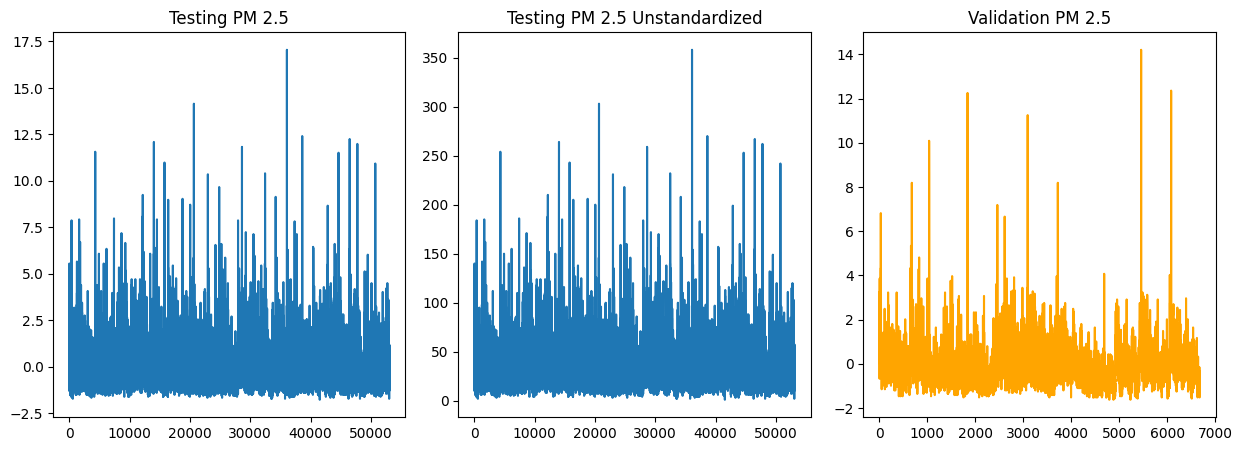

In [ ]:
data = CityDataSet(city_seqs, train_cities, valid_cities)

fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.15)
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

print('plotting graph of the (standardized) training y (pm25) data points traindata.y')
axes1.plot(data.trainy)
axes1.set_title('Testing PM 2.5')
print('plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y')
axes2.plot([undo_pm25_standardization(y) for y in data.trainy])
axes2.set_title('Testing PM 2.5 Unstandardized')
print('plotting graph of the (std) validation y (pm25) data points valdata.y')
axes3.plot(data.validy, color='orange')
axes3.set_title('Validation PM 2.5')
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

Testing a session without gradient clipping!

NOTICE: APPEARS to OVERFIT!

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential0_ (
  Parameter sequential0_lstm0_l0_i2h_weight (shape=(128, 11), dtype=float32)
  Parameter sequential0_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/100], loss: 0.1120516 , 57.5978 sec | validate loss: 0.0944686 , 3.0228 sec
epoch [2/100], loss: 0.0719381 , 62.1695 sec | validate loss: 0.0942505 , 3.8377 sec
epoch [3/100], loss: 0.0668789 , 56.3382 sec | validate loss: 0.0891190 , 4.0757 sec
epoch [4/100], loss: 0.0633758 , 54.5428 sec | validate loss: 0.0840694 , 3.7327 sec
epoch 

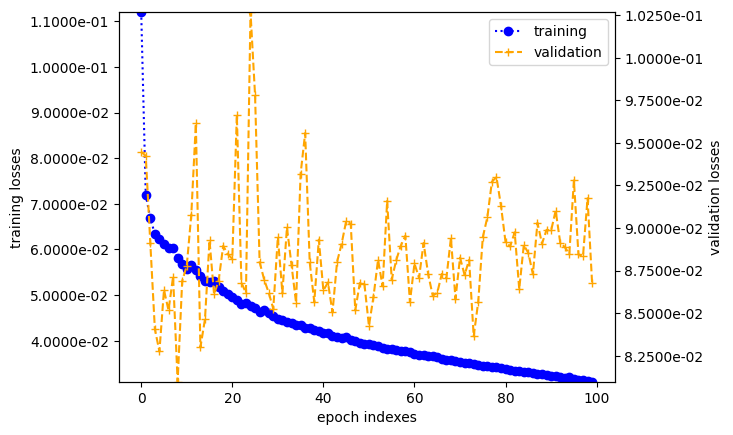

debug: testing:  tlosses min 0.03100530469206948
debug: testing:  tlosses max 0.11205163632089617
debug: validate: vlosses min 0.08097486106197632
debug: validate: vlosses max 0.102680557858871


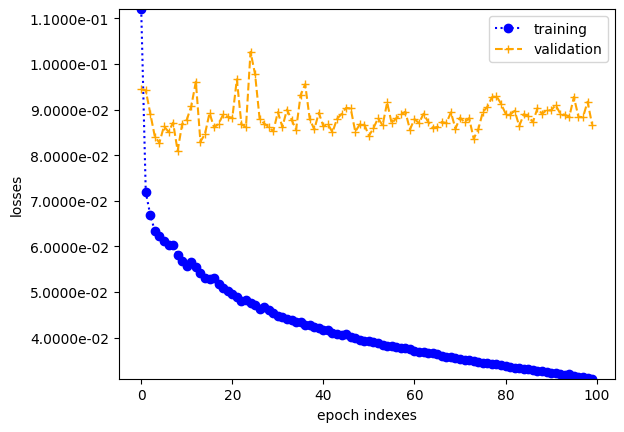

In [ ]:
epochs = 100

net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net, clip_grad=None)   # <--- no gradient clip
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=epochs, test_dataloader=val_dataloader, 
                         save_every=10, save_filename_template='test_net_2_nogradclip_e{}.params',
                         _gradient_clip = False,   # <--- no gradient clip
                         _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec (hh:mm:ss {})'.format(_timediff, secs_to_hhmmss(_timediff)))

# save net params in case Google Colab session ends
file_name = f"params/test_net_2_nogradclip_e{epochs}_end.params"
net.save_parameters(file_name)
# # copy out to drive and back
# !cp 'params/test_net_1.params' 'drive/MyDrive/Colab Notebooks/params/test_net_1.params'
# !cp 'drive/MyDrive/Colab Notebooks/params/test_net_1.params' ./params
# print(f'saved parameters to "{file_name}"')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

len(data_y_points), _input_len + len(pred_y): 59777 , 59784
debug: len pred_y:    59777
debug: len _px range: 59777
debug: first 8 of data_y_points: [array([0.22235825]), array([-0.78017505]), array([-1.30782416]), array([-1.20229434]), array([-0.9912347]), array([-0.83293996]), array([-0.5163505]), array([-0.35805577])]
debug: first 8 of pred_y:        [array(0.41103142), array(-0.4372729), array(-1.44887), array(-1.3277729), array(-0.79504013), array(-0.6880522), array(-0.51427686), array(-0.20308596)]
debug: last 8 of  data_y_points: [array([-0.14699612]), array([-1.09676452]), array([-0.67464523]), array([-1.25505925]), array([-1.5188838]), array([-1.30782416]), array([-0.88570487]), array([-1.30782416])]
debug: last 8 of  pred_y:        [array(0.15408126), array(-0.65956604), array(-0.07651961), array(-0.6150603), array(-1.158094), array(-0.74524987), array(-0.38214242), array(-1.1920389)]
debug: last 8 of _px:  [59769 59770 59771 59772 59773 59774 59775 59776]


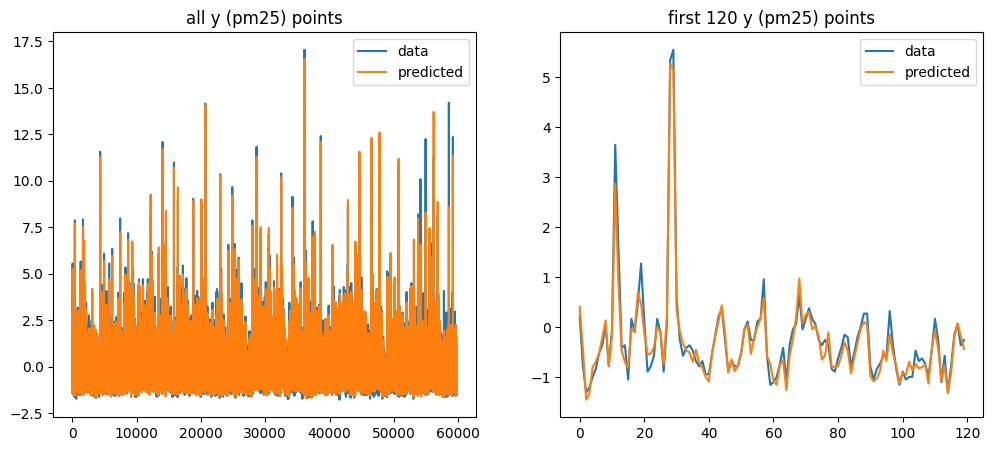

In [ ]:
fig = plt.figure(figsize=(12, 5))
# fig.subplots_adjust(hspace=0.1, wspace=0.15)
axes1 = fig.add_subplot(1, 2, 1); axes2 = fig.add_subplot(1, 2, 2)

pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _axes=axes1, _plt_title='all y (pm25) points', _debug=True)

plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len, _axes=axes2, _plt_title='first 120 y (pm25) points')

plt.show()

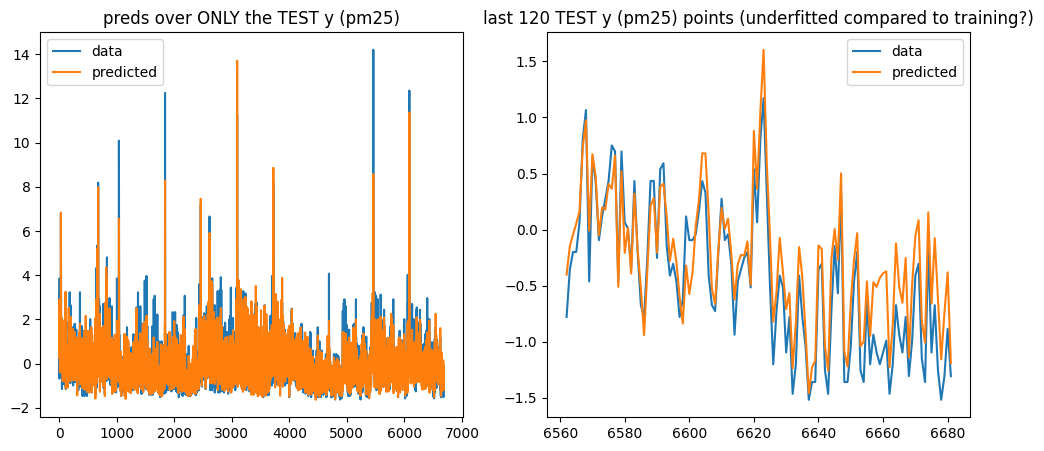

In [ ]:
# Try plotting just part of the VALIDATION y data, to see if the reported overfitting is obvious
fig = plt.figure(figsize=(12, 5))
# fig.subplots_adjust(hspace=0.1, wspace=0.15)
axes1 = fig.add_subplot(1, 2, 1); axes2 = fig.add_subplot(1, 2, 2)

pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train=False), data.validy, net, _axes=axes1, _plt_title='preds over ONLY the TEST y (pm25)', _debug=False)

plot_preds_multivar_sliced(slice(-120,None), pred_y, true_y, input_len, _axes=axes2, _plt_title='last 120 TEST y (pm25) points (underfitted compared to training?)')

plt.show()

## test_net_3, Adam SGD

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential3_ (
  Parameter sequential3_lstm0_l0_i2h_weight (shape=(128, 11), dtype=float32)
  Parameter sequential3_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential3_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/80], loss: 0.3076648 , 75.8561 sec | validate loss: 0.3334874 , 3.2431 sec
epoch [2/80], loss: 0.2938441 , 83.1504 sec | validate loss: 0.3105591 , 3.9818 sec
epoch [3/80], loss: 0.2623213 , 90.9125 sec | validate loss: 0.2773406 , 3.3609 sec
epoch [4/80], loss: 0.2529585 , 93.2053 sec | validate loss: 0.3456161 , 3.3951 sec
epoch [5/8

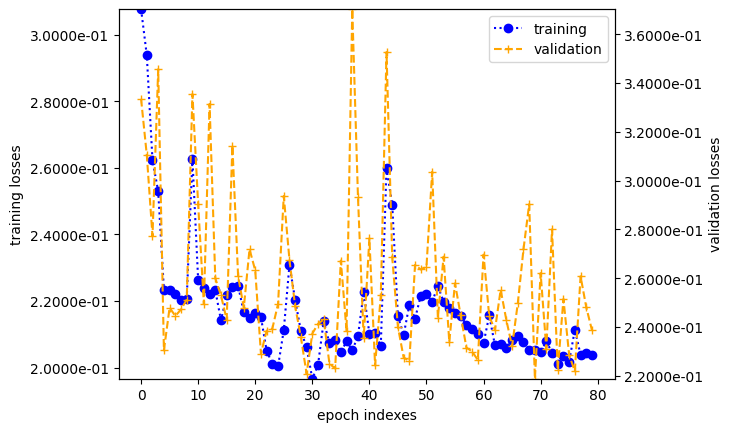

debug: testing:  tlosses min 0.19668774672844636
debug: testing:  tlosses max 0.3076647899677414
debug: validate: vlosses min 0.2188540043564595
debug: validate: vlosses max 0.3702462191312234


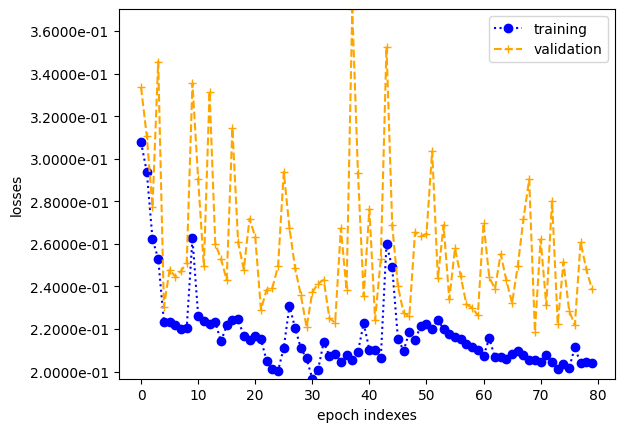

In [ ]:
epochs = 80

net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net, sgdtype='adam', lr=0.1)   # <--- Adam SGD.  And yes clip_grad is on again
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=epochs, test_dataloader=val_dataloader, 
                         save_every=10, save_filename_template='test_net_3_adam_e{epoch}_tloss{tloss:.7f}_vloss{vloss:.7f}.params',
                         _gradient_clip = False,   # <--- no gradient clip in train()
                         _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec (hh:mm:ss {})'.format(_timediff, secs_to_hhmmss(_timediff)))

# save net params in case Google Colab session ends
file_name = f"params/test_net_3_adam_e{epochs}_end.params"
net.save_parameters(file_name)
# # copy out to drive and back
# !cp 'params/test_net_1.params' 'drive/MyDrive/Colab Notebooks/params/test_net_1.params'
# !cp 'drive/MyDrive/Colab Notebooks/params/test_net_1.params' ./params
# print(f'saved parameters to "{file_name}"')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

len(data_y_points), _input_len + len(pred_y): 59777 , 59784
debug: len pred_y:    59777
debug: len _px range: 59777
debug: first 8 of data_y_points: [array([0.22235825]), array([-0.78017505]), array([-1.30782416]), array([-1.20229434]), array([-0.9912347]), array([-0.83293996]), array([-0.5163505]), array([-0.35805577])]
debug: first 8 of pred_y:        [array(0.5612028), array(0.14661884), array(-0.76806617), array(-0.6551044), array(-0.06701529), array(-0.15026999), array(0.00974524), array(0.09871042)]
debug: last 8 of  data_y_points: [array([-0.14699612]), array([-1.09676452]), array([-0.67464523]), array([-1.25505925]), array([-1.5188838]), array([-1.30782416]), array([-0.88570487]), array([-1.30782416])]
debug: last 8 of  pred_y:        [array(-0.19143677), array(-0.08695459), array(-0.00617623), array(-0.6044326), array(-0.92008233), array(-0.87917805), array(-0.81026196), array(-0.9301858)]
debug: last 8 of _px:  [59769 59770 59771 59772 59773 59774 59775 59776]


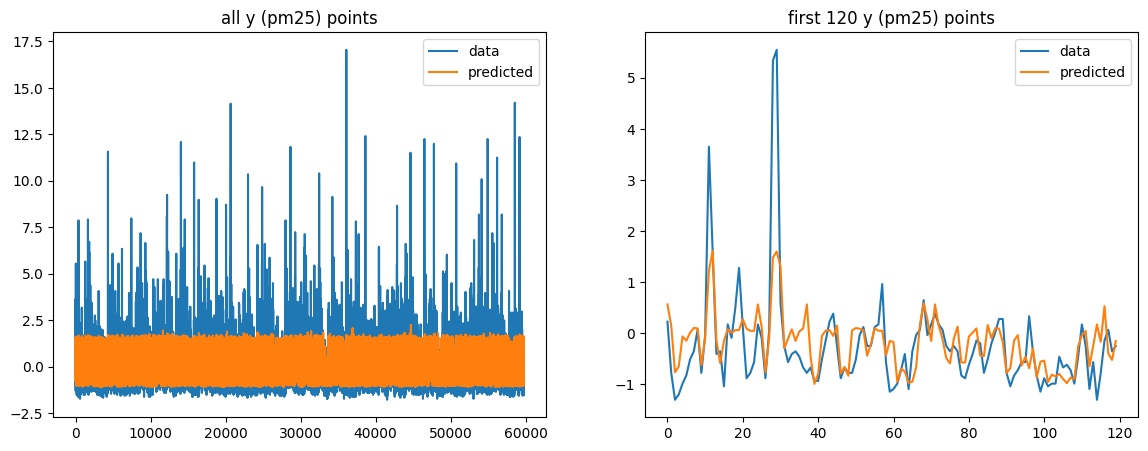

In [ ]:
fig = plt.figure(figsize=(14, 5))
# fig.subplots_adjust(hspace=0.1, wspace=0.15)
axes1 = fig.add_subplot(1, 2, 1); axes2 = fig.add_subplot(1, 2, 2)

pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _axes=axes1, _plt_title='all y (pm25) points', _debug=True)

plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len, _axes=axes2, _plt_title='first 120 y (pm25) points')

plt.show()

the Adam sgd creates much different results with this configuration. grad clip 5 in trainer, no manual grad clip in train(...).

# Testing creating a multivariate sampler / dataloader in a manner like before

Based on documentation from
https://mxnet.apache.org/versions/1.7/api/python/docs/api/gluon/data/index.html#mxnet.gluon.data.ArrayDataset

and examples from https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

THIS SECTION IS LESS RELEVANT NOW

In here I toyed with how to create gluon ArrayDatasets and DataLoaders wrapping my filtered City Data so I could feed it through a network.

## Experimenting with gluon.data samplers, DataLoader

In [ ]:
sampler = gluon.data.SequentialSampler(10)
batch_sampler = gluon.data.BatchSampler(sampler, 3, 'keep')
print(list(batch_sampler))

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9]]


In [ ]:
sampler = gluon.data.RandomSampler(10)
batch_sampler = gluon.data.BatchSampler(sampler, 3, 'rollover')
print(list(batch_sampler))

[[2, 4, 8], [0, 6, 1], [5, 9, 7]]


In [ ]:
sampler = gluon.data.RandomSampler(10)
batch_sampler = gluon.data.BatchSampler(sampler, 3, 'keep')

dataloader = mx.gluon.data.DataLoader(np.arange(10), batch_sampler=batch_sampler)
print(list(enumerate(dataloader)))

sampler = gluon.data.RandomSampler(10)
batch_sampler = gluon.data.BatchSampler(sampler, 3, 'keep')

dataloader = mx.gluon.data.DataLoader(np.arange(10,20), batch_sampler=batch_sampler)
print(list(enumerate(dataloader)))

[(0, array([6, 4, 0], dtype=int64)), (1, array([5, 8, 3], dtype=int64)), (2, array([2, 1, 9], dtype=int64)), (3, array([7], dtype=int64))]
[(0, array([18, 17, 12], dtype=int64)), (1, array([16, 14, 13], dtype=int64)), (2, array([15, 11, 19], dtype=int64)), (3, array([10], dtype=int64))]


In [ ]:
np.random.randint(1, 10, size=(5,2))

array([[1, 6],
       [1, 2],
       [8, 6],
       [9, 7],
       [1, 3]])

## Experimenting with ArrayDataset


In [ ]:
dataloader = mx.gluon.data.DataLoader(np.arange(10,20), batch_size=3, shuffle=False, last_batch='keep')
print(list(enumerate(dataloader)))

ds = np.random.randint(1, 10, size=(5,2))
print(ds)
dataloader = mx.gluon.data.DataLoader(ds, batch_size=3, shuffle=False, last_batch='keep')
print(list(enumerate(dataloader)))
dataset = mx.gluon.data.ArrayDataset(ds)
dataloader = mx.gluon.data.DataLoader(dataset, batch_size=3, shuffle=False, last_batch='keep')
print(list(enumerate(dataloader)))

[(0, array([10, 11, 12], dtype=int64)), (1, array([13, 14, 15], dtype=int64)), (2, array([16, 17, 18], dtype=int64)), (3, array([19], dtype=int64))]
[[2 6]
 [3 7]
 [8 9]
 [2 9]
 [9 1]]
[(0, array([[2, 6],
       [3, 7],
       [8, 9]], dtype=int64)), (1, array([[2, 9],
       [9, 1]], dtype=int64))]
[(0, array([[2, 6],
       [3, 7],
       [8, 9]], dtype=int64)), (1, array([[2, 9],
       [9, 1]], dtype=int64))]


In [ ]:
# univariate, recombined via slicing and np.stack(..., 1)
feat1 = np.random.randint(1, 10, size=(10,))
print('feat1:')
print(feat1)
print('sequencing:')
_tau = 3
_T = len(feat1)
featseq = np.stack([feat1[i : _T-_tau + i] for i in range(_tau)], 1)
lbls = feat1[_tau:].reshape((-1,1))  # lbls out of same array
print(featseq)
print(lbls)

print()
dataset = mx.gluon.data.ArrayDataset(featseq, lbls)
print(dataset[2])

print()
dataloader = mx.gluon.data.DataLoader(dataset, batch_size=3, shuffle=False, last_batch='keep')
print(list(enumerate(dataloader)))

feat1:
[2 1 4 4 6 3 5 6 3 1]
sequencing:
[[2 1 4]
 [1 4 4]
 [4 4 6]
 [4 6 3]
 [6 3 5]
 [3 5 6]
 [5 6 3]]
[[4]
 [6]
 [3]
 [5]
 [6]
 [3]
 [1]]

(array([4, 4, 6]), array([3]))

[(0, [array([[2, 1, 4],
       [1, 4, 4],
       [4, 4, 6]], dtype=int64), array([[4],
       [6],
       [3]], dtype=int64)]), (1, [array([[4, 6, 3],
       [6, 3, 5],
       [3, 5, 6]], dtype=int64), array([[5],
       [6],
       [3]], dtype=int64)]), (2, [array([[5, 6, 3]], dtype=int64), array([[1]], dtype=int64)])]


## multivariate

In [ ]:
# trying multivariate
feat1 = np.arange(10, 100, 10)
feat2 = np.arange(15, 15+10*len(feat1), 10)
lbl1 = feat1 + feat2
print(feat1)
print(feat2)
print(lbl1)

# notice: stacking into "columns" already into one array of features
feats = np.stack([feat1, feat2], 1)
print('feats:')
print(feats)

print('sequencing:')
_tau = 3
_T = len(feats)
featseq = np.stack([feats[i : _T-_tau + 1 + i] for i in range(_tau)], 1)  # _T-_tau + 1 to get whole length of feats
lbls = lbl1[_tau - 1:].reshape((-1,1))  # [_tau - 1] to get the tau'th onward
print(featseq)
print(lbls)
print('Is shape (num_samples, seq_length, num_inputs) ?  num_inputs is num_features')
print('featseq.shape:', featseq.shape)
print('lbls.shape:', lbls.shape)

print()
dataset = mx.gluon.data.ArrayDataset(featseq, lbls)
print(dataset[2])

print()
dataloader = mx.gluon.data.DataLoader(dataset, batch_size=4, shuffle=False, last_batch='keep')
print(list(enumerate(dataloader)))
# LSTM: 'TNC' corresponds to input tensor shape (seq_length, batch_size, num_inputs)
#  so 'NTC' is (batch_size, seq_length, num_inputs)
_batch_sample = next(iter(dataloader))
print('first sample: (batch shape, label shape):', tuple(a.shape for a in _batch_sample))
print('\'NTC\' is (batch_size, seq_length, num_inputs)')

[10 20 30 40 50 60 70 80 90]
[15 25 35 45 55 65 75 85 95]
[ 25  45  65  85 105 125 145 165 185]
feats:
[[10 15]
 [20 25]
 [30 35]
 [40 45]
 [50 55]
 [60 65]
 [70 75]
 [80 85]
 [90 95]]
sequencing:
[[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]

 [[70 75]
  [80 85]
  [90 95]]]
[[ 65]
 [ 85]
 [105]
 [125]
 [145]
 [165]
 [185]]
Is shape (num_samples, seq_length, num_inputs) ?  num_inputs is num_features
featseq.shape: (7, 3, 2)
lbls.shape: (7, 1)

(array([[30, 35],
       [40, 45],
       [50, 55]]), array([105]))

[(0, [array([[[10, 15],
        [20, 25],
        [30, 35]],

       [[20, 25],
        [30, 35],
        [40, 45]],

       [[30, 35],
        [40, 45],
        [50, 55]],

       [[40, 45],
        [50, 55],
        [60, 65]]], dtype=int64), array([[ 65],
       [ 85],
       [105],
       [125]], dtype=int64)]), (1, [array([[[50, 55]

In [ ]:
net = create_net()
net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

#-----------

# Iterate over training data
for idx, (batch, label) in enumerate(dataloader):

    print('idx:', idx)
    print('(batch, label):', (batch, label))
    print('shapes:', (batch.shape, label.shape))

    # batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
    #  ^^ no need to reshape for inputsize because it already is in batch.shape
    batch = batch.astype('float32')

    batch = batch.as_in_context(ctx)
    label = label.as_in_context(ctx)

    batch_size = batch.shape[0]

    with autograd.record():  # train_mode defaults to True
        
        ## Forward pass
        predicted = net(batch)
        
        ## Compute loss
        loss: mx.numpy.ndarray = loss_fn(predicted, label)

        print(predicted)
        print(loss)
        break

print(net)

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
idx: 0
(batch, label): (array([[[10, 15],
        [20, 25],
        [30, 35]],

       [[20, 25],
        [30, 35],
        [40, 45]],

       [[30, 35],
        [40, 45],
        [50, 55]],

       [[40, 45],
        [50, 55],
        [60, 65]]], dtype=int64), array([[ 65],
       [ 85],
       [105],
       [125]], dtype=int64))
shapes: ((4, 3, 2), (4, 1))
[[-0.02378533]
 [-0.02598313]
 [-0.02528667]
 [-0.02355934]]
[2114.0466 3614.7092 5515.1553 7815.4453]
Sequential(
  (0): LSTM(2 -> 32, NTC, num_layers=3)
  (1): Dense(96 -> 1, linear)
)


## Testing sine (can delete this?)

plotting graph of the raw data points data.x


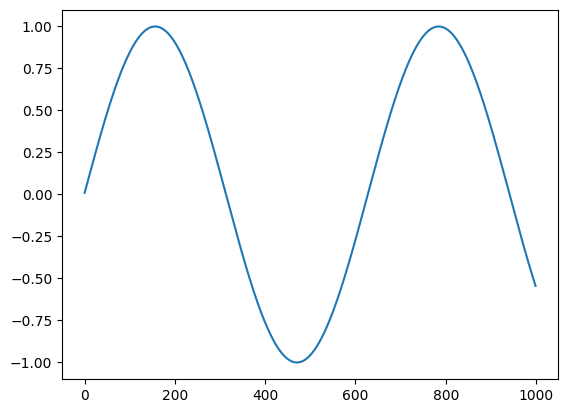

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential14_ (
  Parameter sequential14_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential14_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential14_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential14_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential14_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential14_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential14_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/20], loss: 0.2544844 , 0.9758 sec | validate loss: 0.1968371 , 0.1986 sec
epoch [2/20], loss: 0.2141883 , 0.9736 sec | validate loss: 0.1378298 , 0.1957 sec
epoch [3/20], loss: 0.0870682 , 0.9944 sec | validate loss: 0.0072204 , 0.2339 sec
epoch [4/20], loss: 0.0020023 , 0.9474 sec | validate loss: 0.0012875 , 0.1911 sec
epoch [

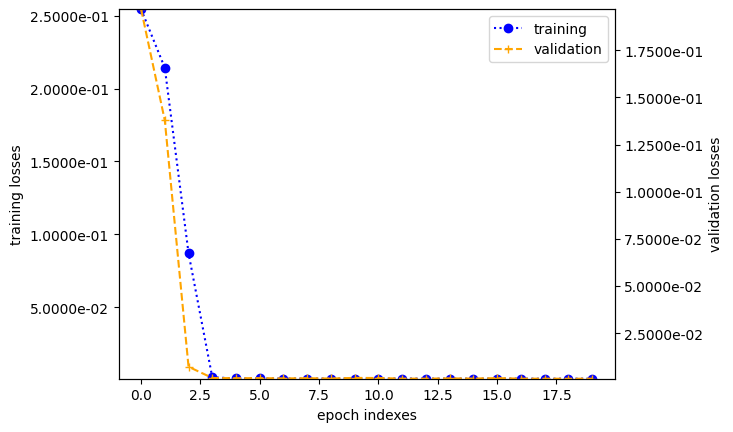

debug: testing:  tlosses min 0.0010069304776773682
debug: testing:  tlosses max 0.2544844209404529
debug: validate: vlosses min 0.0008749328796973919
debug: validate: vlosses max 0.19683706821172806


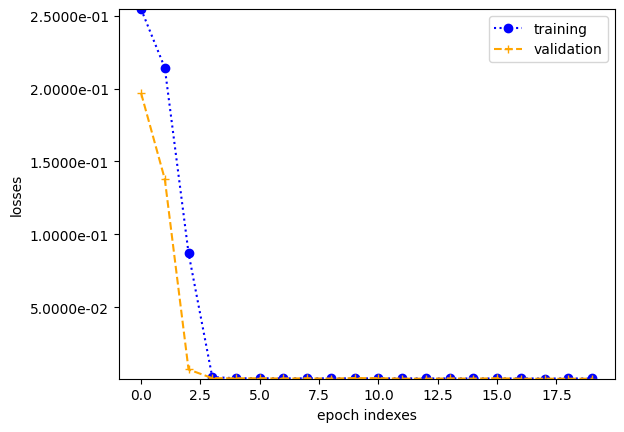

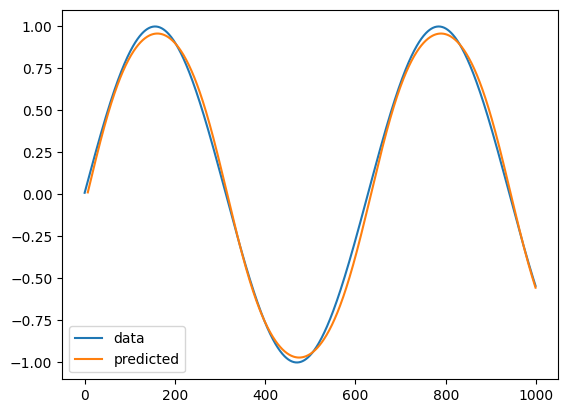

In [ ]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

#--------

net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=20, test_dataloader=val_dataloader, save_every=5, save_filename_template='outtest_e{}.params', _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

save_net_to_file(net, 'outtest_e20_end.params')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

#--------

plot_preds_over_data(data, net, _debug=False)

# Plot datetime and gap testing

Another testing section, less relevant. Finding how to graph city data on a time-based x-axis instead of data point x-axis. This could make a more "meaningful" graph representation of the city data, like Y over time.

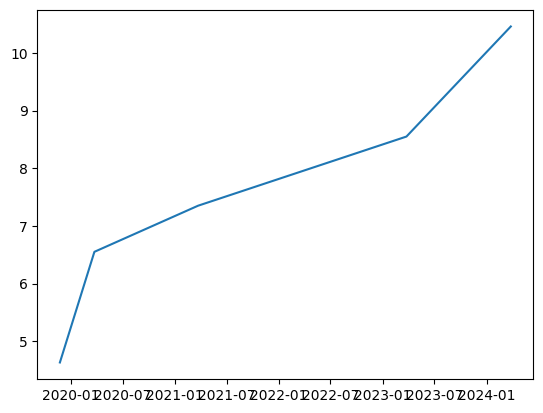

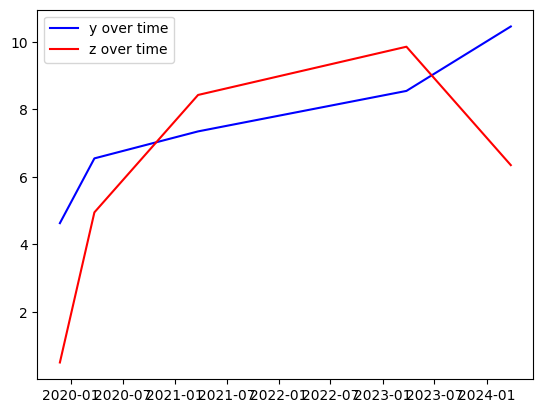

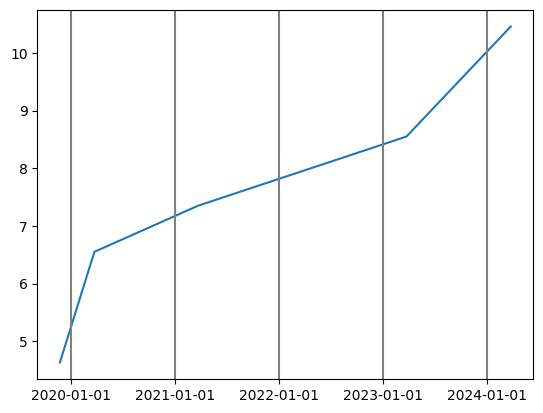

In [ ]:
#https://stackoverflow.com/questions/19079143/how-to-plot-time-series-in-python

from datetime import datetime

x = ['2023-03-25 04:11:37', '2020-03-23 08:11:37', '2019-11-23 01:07:17', '2024-03-25 23:17:37', '2021-03-22 16:27:37']
y = [8.55, 6.55, 4.63, 10.46, 7.35]
z = [9.86, 4.95, 0.5, 6.35, 8.43]
x = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in x]  # convert to datetime



df = pd.DataFrame({'date': x, 'value': y, 'value2': z})
df['date'] = pd.to_datetime(df['date'])                     # convert to datetime



xs, ys = zip(*sorted(zip(x, y)))                 # sort by date
plt.plot(xs, ys);


plt.show()



xs, ys, zs = zip(*sorted(zip(x, y, z)))
plt.plot(xs, ys, label='y over time', color='blue')
plt.plot(xs, zs, label='z over time', color='red')
plt.legend();


plt.show()



from datetime import datetime
import matplotlib.dates as mdates

plt.plot(xs, ys)
xmin, xmax = map(mdates.num2date, plt.xlim())               # get dates on x-limits as dates
for yr in range(xmin.year, xmax.year):
    plt.axvline(datetime(yr + 1, 1, 1), color='gray')       # vertical line on Jan 1 midnight

# show datetimes in a specific format
pos = mdates.AutoDateLocator()                   # detect tick locations automatically
fmt = mdates.DateFormatter('%Y-%m-%d')           # format the datetime with '%Y-%m-%d
plt.gca().xaxis.set(major_locator=pos, major_formatter=fmt)

# if the tick labels are too crowded, keep only a few of them
pos, labels = plt.xticks()                       # get xtick positions and labels
plt.xticks(pos[::2], labels[::2]);               # keep only every second tick